In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np

## 싸이월드 게시글 목록 크롤링

In [3]:
# 비어있는 테이블 만들기
df = pd.DataFrame(columns=['링크','제목','이름','날짜','조회수'])

for i in range(1,59):
    
    page= i
    
    links = []
    titles = []
    writers = []
    dates = []
    views = []

    url = 'http://club.cyworld.com/club/board/general/ListNormal.asp?cpage={0}&club_id=52606748&board_no=51&board_type=1&list_type=2&show_type=1&headtag_seq=&search_type=&search_keyword=&search_block=1'.format(page)

    r = requests.get(url)

    r.encoding = 'euc-kr'

    soup = bs(r.text, 'html.parser')
    



    for tr in soup.find_all('tr')[1:]:
        if tr.select('.no_article'):
            break
        links.append('http://club.cyworld.com' + tr.find('a')['onclick'].split("'")[1])
        if tr.find('img'):
            titles.append('▶'+tr.select('.col_title')[0].text.strip())
        else:
            titles.append(tr.select('.col_title')[0].text.strip())
            writers.append(tr.select('.wrap_namebox')[0].text)
            dates.append(tr.select('.col_date')[0].text)
            views.append(tr.select('.col_view')[0].text)

    articlesDict = {'링크':links,'제목':titles,'이름':writers,'날짜':dates,'조회수':views}

    temDf = pd.DataFrame(articlesDict)

    df = df.append(temDf)

In [91]:
# 게시글과 게시글 답변 구분하기

links = []
titles = []

for tr in soup.find_all('tr')[1:]:
    for td in tr.find_all('td')[1:]:
        if td.find('a'):
            links.append('http://club.cyworld.com' + td.find('a')['onclick'].split("'")[1])
            if td.find('img'):
                titles.append('▶'+td.text.strip())
            else:
                titles.append(td.text.strip())
        else:
            print(td.text)

http://club.cyworld.com/Club/Board/General/View.asp?club_id=52606748&board_no=51&search_type=&search_keyword=&item_seq=23464537&cpage=58&search_block=1&Scpage=1&board_type=1&list_type=2&show_type=1&headtag_seq=&club_auth=x
▶[정샘] 과방은...어찌된건가요?ㅜㅜ
익 명
2009.04.05
148


http://club.cyworld.com/Club/Board/General/View.asp?club_id=52606748&board_no=51&search_type=&search_keyword=&item_seq=23465006&cpage=58&search_block=1&Scpage=1&board_type=1&list_type=2&show_type=1&headtag_seq=&club_auth=x
▶과방은...어찌된건가요?ㅜㅜ
익 명
2009.04.05
100


http://club.cyworld.com/Club/Board/General/View.asp?club_id=52606748&board_no=51&search_type=&search_keyword=&item_seq=23465453&cpage=58&search_block=1&Scpage=1&board_type=1&list_type=2&show_type=1&headtag_seq=&club_auth=x
▶과방은...어찌된건가요?ㅜㅜ
익 명
2009.04.05
96


http://club.cyworld.com/Club/Board/General/View.asp?club_id=52606748&board_no=51&search_type=&search_keyword=&item_seq=23466052&cpage=58&search_block=1&Scpage=1&board_type=1&list_type=2&show_type=1&headtag_seq=&cl

### 위에서 만든 링크 목록으로 글 내용 가져오기

In [58]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [59]:
CHROME_PATH = 'C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe'
CHROMEDRIVER_PATH = 'C:\\Users\\acous\\PythonCoding\\Projects\\chromedriver.exe'
WINDOW_SIZE = "1920,1080"

In [13]:
url = 'http://club.cyworld.com/Club/Board/General/View.asp?club_id=52606748&board_no=51&search_type=&search_keyword=&item_seq=23464537&cpage=58&search_block=1&Scpage=1&board_type=1&list_type=2&show_type=1&headtag_seq=&club_auth=x'

rr = requests.get(url)

popurl = rr.text.split("'")[1]

driver = webdriver.Chrome(executable_path=CHROMEDRIVER_PATH)
driver.get(popurl)

driver.find_element_by_id('uid').send_keys('dnxkq1@naver.com')
driver.find_element_by_id('upw').send_keys('******')

In [11]:
driver.find_element_by_class_name('btn_login').click()

In [25]:
driver.close()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=71.0.3578.98)
  (Driver info: chromedriver=2.46.628402 (536cd7adbad73a3783fdc2cab92ab2ba7ec361e1),platform=Windows NT 10.0.17134 x86_64)


### 게시글 세부내용 크롤링

In [112]:
links = list(df['링크'])

In [204]:

url = 'http://club.cyworld.com/Club/Board/General/View.asp?club_id=52606748&board_no=51&search_type=&search_keyword=&item_seq=23464537&cpage=58&search_block=1&Scpage=1&board_type=1&list_type=2&show_type=1&headtag_seq=&club_auth=x'
driver = webdriver.Chrome(executable_path=CHROMEDRIVER_PATH)
driver.get(url)

current_window_handle = driver.current_window_handle

#Get all window handles
window_handles = driver.window_handles
#List start with the 0 index
driver.switch_to.window(window_handles[1])

driver.find_element_by_id('uid').send_keys('dnxkq1@naver.com')
driver.find_element_by_id('upw').send_keys('Aa060141')

driver.find_element_by_class_name('btn_login').click()

driver.switch_to.window(window_handles[0])

results = []

for i in links:
    driver.get(i)
    title = driver.find_element_by_tag_name('h4').text
    count = driver.find_element_by_css_selector('.countinfo em').text
    mainContent = driver.find_element_by_id('main_content').text
    date = driver.find_element_by_css_selector('.dateinfo').text
    comments = driver.find_elements_by_css_selector('.replylist .title')
    commentLength = len(comments)
    if len(comments) == 0:
        results.append([title, date, count, commentLength, mainContent, np.nan])
    else:
        for i in comments:
            temp = [title, date, count, commentLength, mainContent, i.text]
            results.append(temp)
    

driver.close()

In [215]:
title = []
date = []
count = []
commentLength = []
article = []
comments = []
for i in results:
    title.append(i[0])
    date.append(i[1])
    count.append(i[2])
    commentLength.append(i[3])
    article.append(i[4])
    comments.append(i[5])

In [218]:
df3 = pd.DataFrame({'제목':title,'날짜':date,'조회수':count,'총댓글수':commentLength,'내용':article,'댓글':comments})

In [221]:
df3['내용'] = df3['내용'].replace(r'\n',' ', regex=True).str.strip()

In [223]:
df3.to_excel('싸이월드최종크롤링결과.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'http://cpa.fss.or.kr/kor/cpa/index.action%20%20%20금융감독원%20공인중계사%20시험%20홈페이지%20입니다.%20%20%20상단에%20자료실-학점이수%20자료%20에%20들어가시면%20%20%20내가%20수강한%20과목이%20CPA%20기준%20학점에%20인정이%20되는지,%20%20%20경영/회계/경제%20중%20어디에%20해당하는지%20검색할%20수%20있습니다.%20%20%20수강했던%20과목이%20궁금하거나%20개인적으로%20수강하실때%20참고하세요~%20%20원문내용(작성자:익%20명)-----------------------------------%20%20~%201학년%202학기%20~%202학년%201학기%20%20%20커리%20대로라면%20회계/경영%20관련%20몇%20학점%20이수인지%20좀%20가르쳐%20주시면%20감사하겠씁니다.%20남은%20방학%20잘%20보내시구요!' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'http://club.cyworld.com/clubV1/Home.cy/52606748%20공지사항%20올렸듯이%20세미나실%20환경개선%20작업은%2010월중에%20마무리되는것으로%20추진되다가,%20유관부서%20사정에%20따라%20얼마전에%20마무리가%20되었습니다.%20저로써도%20공지사항보다%20늦어져서%20어떻게든%20빨리%20추진하려다가%20기말고사%20전%20팀플%20많은%20시즌에는%2

In [123]:
df2 = pd.DataFrame({'게시글':article, '댓글': comments})

In [127]:
df = df[['제목','날짜','조회수']]

In [129]:
df['제목'].replace(r'\xa0', '    ', regex=True, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [131]:
df['댓글수'] = df['제목'].str.extract(' (\[([0-9]+)\]$)')[1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
df['댓글수'] = df['댓글수'].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
df2['게시글'] = df2['게시글'].replace(r'\n',' ', regex=True).str.strip()

In [140]:
df['제목'][df['제목'].str.contains('\s\s\s\s')] = df['제목'][df['제목'].str.contains('\s\s\s\s')].str[:-6].str.strip()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [162]:
list(df.itertuples())[0][-1]

'3'

In [186]:
result = []
for tup in df.itertuples(index=False):
    if int(tup[-1]) == 0:
        result.append((tup))
    else:    
        for d in range(int(tup[-1])):
            result.append((tup))

In [187]:
len(result)

3779

In [174]:
dfnew = pd.DataFrame(result)

In [171]:
# [(tup) for tup in df.itertuples(index=False) for d in range(int(tup[-1]))][-1]

Pandas(제목='▶진짜 요즘 느끼는건데...', 날짜='2010.04.26', 조회수=218, 댓글수='1')

In [175]:
pd.concat([dfnew,df2], axis=1, ignore_index=True)

,0,1,2,3,4,5
0,오랜만에 클럽 왔는데 등록금 얘기가 핫하네요,2017.07.05,532,3,상위 대학들보다 커트라인도 낮은데 등록금은 심각하게 높은 편인데 혜택은 눈에 띄게 ...,000님이말하시는거면일단믿고거르시면됩니다.학과는전혀해결할의지가보이지도않구요.그냥반수...
1,오랜만에 클럽 왔는데 등록금 얘기가 핫하네요,2017.07.05,532,3,상위 대학들보다 커트라인도 낮은데 등록금은 심각하게 높은 편인데 혜택은 눈에 띄게 ...,저 같은 경우는 수시 지원 시 100% 영어 수업이라는 점에 끌려 지원한 점도 있는...
2,오랜만에 클럽 왔는데 등록금 얘기가 핫하네요,2017.07.05,532,3,상위 대학들보다 커트라인도 낮은데 등록금은 심각하게 높은 편인데 혜택은 눈에 띄게 ...,"특성화학과면 개성있는 특이한 점이 있어야 하는데, 영어 강의 수를 늘린 건 일찍한 ..."
3,등록금,2017.06.17,925,24,타운홀미팅 내용 꼼꼼히 적어주신 덕에 잘 보았습니다. 문제를 공론화할 수 있는 자리...,학교 회계 상으로 우리가 낸 등록금이 우리를 위해서만 사용하도록 예산이 되어 있지 ...
4,등록금,2017.06.17,925,24,타운홀미팅 내용 꼼꼼히 적어주신 덕에 잘 보았습니다. 문제를 공론화할 수 있는 자리...,전체 등록금을 합쳐서 그 후에 분배하는 것으로.. 등록금을 줄이려고 하기 위해서는 ...
5,등록금,2017.06.17,925,24,타운홀미팅 내용 꼼꼼히 적어주신 덕에 잘 보았습니다. 문제를 공론화할 수 있는 자리...,솔직히 등록금 못 줄여주면 학교에서 특혜 깡패로 만들어줘야 한다고 봅니다.
6,등록금,2017.06.17,925,24,타운홀미팅 내용 꼼꼼히 적어주신 덕에 잘 보았습니다. 문제를 공론화할 수 있는 자리...,"많은 부분이 설명되지 않고 있지만, 특히 같은 국제관 사용하고, 같은 목적의 특수학..."
7,등록금,2017.06.17,925,24,타운홀미팅 내용 꼼꼼히 적어주신 덕에 잘 보았습니다. 문제를 공론화할 수 있는 자리...,글경제 등록금은 483만 7천원 이라고해요
8,등록금,2017.06.17,925,24,타운홀미팅 내용 꼼꼼히 적어주신 덕에 잘 보았습니다. 문제를 공론화할 수 있는 자리...,483만원이 맞습니다. 약60만원정도 차이
9,등록금,2017.06.17,925,24,타운홀미팅 내용 꼼꼼히 적어주신 덕에 잘 보았습니다. 문제를 공론화할 수 있는 자리...,아까 510만원 이라고 하신분 그냥 잘못 알았다고 한마디 정도 하시고 잘못된 정보 ...


In [119]:
df['게시물내용'] = article

,링크,제목,이름,날짜,조회수
0,http://club.cyworld.com/Club/Board/General/Vie...,오랜만에 클럽 왔는데 등록금 얘기가 핫하네요 [3],익 명,2017.07.05,532
1,http://club.cyworld.com/Club/Board/General/Vie...,등록금 [24],익 명,2017.06.17,925
2,http://club.cyworld.com/Club/Board/General/Vie...,등록금 관련 여쭤보고싶은 것이 있습니다 [1],익 명,2017.05.29,280
3,http://club.cyworld.com/Club/Board/General/Vie...,후배님들에게 드리고 싶은 말씀을 적어봅니다. [7],익 명,2017.05.11,562
4,http://club.cyworld.com/Club/Board/General/Vie...,강의실 대여와 관련해서 건의사항이 있습니다 [2],익 명,2017.05.11,235
5,http://club.cyworld.com/Club/Board/General/Vie...,시험 관련 [3],익 명,2017.04.27,470
6,http://club.cyworld.com/Club/Board/General/Vie...,10기에도 익명톡을 만들면 좋겠습니다. [4],익 명,2017.04.24,409
7,http://club.cyworld.com/Club/Board/General/Vie...,과방 깨끗하게 이용해주세요,익 명,2017.04.24,189
8,http://club.cyworld.com/Club/Board/General/Vie...,국제관 열람실 내 노트북 이용(타이핑) 관련 [2],익 명,2017.04.23,300
9,http://club.cyworld.com/Club/Board/General/Vie...,철야강의실에관하여 [5],익 명,2017.04.19,450


In [65]:
df['내용'] = results

In [67]:
df.to_excel('cyworldAnonymousIncludeContent.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'http://cpa.fss.or.kr/kor/cpa/index.action
%20%20금융감독원%20공인중계사%20시험%20홈페이지%20입니다.
%20%20상단에%20자료실-학점이수%20자료%20에%20들어가시면
%20%20내가%20수강한%20과목이%20CPA%20기준%20학점에%20인정이%20되는지,
%20%20경영/회계/경제%20중%20어디에%20해당하는지%20검색할%20수%20있습니다.
%20%20수강했던%20과목이%20궁금하거나%20개인적으로%20수강하실때%20참고하세요~

원문내용(작성자:익%20명)-----------------------------------

~%201학년%202학기
~%202학년%201학기
%20%20커리%20대로라면
회계/경영%20관련%20몇%20학점%20이수인지%20좀%20가르쳐%20주시면%20감사하겠씁니다.
남은%20방학%20잘%20보내시구요!' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))


## 다음카페 크롤링

In [124]:
url = 'http://cafe.daum.net/skkugba/f8hr'
driver = webdriver.Chrome(executable_path=CHROMEDRIVER_PATH)
driver.get(url)
#Get all window handles
# window_handles = driver.window_handles

In [118]:
driver.switch_to.default_content()

In [125]:
#List start with the 0 index
# driver.switch_to.window(window_handles[0])

In [126]:
driver.switch_to.frame("down")

In [128]:
soup = bs(driver.page_source,'html.parser')

In [123]:
driver.close()

In [6]:
import datetime as dt

In [3]:
df = pd.read_excel('daumAnonymousIncludeContent.xlsx')

In [4]:
df.columns = ['제목','날짜','조회수','추천','내용']

In [10]:
df['날짜'][0].split('.')[0]

'18'

In [13]:
df['날짜'] = df['날짜'].apply(lambda x: dt.date(int('20' + x.split('.')[0]),int(x.split('.')[1]),int(x.split('.')[2])))

In [15]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
제목     60 non-null object
날짜     60 non-null datetime64[ns]
조회수    60 non-null int64
추천     60 non-null int64
내용     60 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.4+ KB


In [23]:
daum = df

In [28]:
daum = daum[['제목','날짜','조회수','내용']]

In [18]:
cyworld = pd.read_excel('cyworldAnonymousIncludeContent.xlsx')

In [27]:
cyworld = cyworld[['제목','날짜','조회수','내용']]

In [20]:
cyworld['날짜'] = pd.to_datetime(cyworld['날짜'])

In [22]:
cyworld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 860
Data columns (total 6 columns):
링크     861 non-null object
제목     861 non-null object
이름     861 non-null object
날짜     861 non-null datetime64[ns]
조회수    861 non-null int64
내용     859 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 47.1+ KB


In [30]:
df = pd.concat([daum,cyworld],ignore_index=True)

In [32]:
df.to_excel('anonymousAll.xlsx')

In [120]:
df = pd.read_excel('anonymousAll.xlsx')

In [58]:
def cleaningText(x):
    try:
        return " ".join(" ".join(x.split('\n')).split())
    except:
        return

In [60]:
cleaningText('3')

'3'

In [121]:
df['내용'] = df['내용'].apply(cleaningText)

## 공백 제거하기 위함

In [97]:
import unicodedata

In [102]:
unicodedata.normalize('NFKD',df['제목'][0]).split('    ')[0]

'1층 라운지에서 배달시켜 먹지 마세요'

In [114]:
df['제목'][0].split('    ')

['1층 라운지에서 배달시켜 먹지 마세요\xa0\xa0\xa0\xa0[4]']

In [130]:
df['제목'] = df['제목'].apply(lambda x: unicodedata.normalize('NFKD',x))

In [133]:
df['제목'][0]

'1층 라운지에서 배달시켜 먹지 마세요    [4]'

In [184]:
df['댓글수'] = df['제목'].str.extract(' (\[([0-9]+)\]$)')[1]

In [187]:
df['댓글수']= df['댓글수'].fillna(0)

In [20]:
df['제목과내용2'] = df['제목'].str.split('\s+\[[0-9]+\]$').str[0] + '. ' + df['내용']

TypeError: must be str, not int

In [202]:
df.to_excel('제목과내용합치기.xlsx')

## 데이터 정리는 끝났으니 어떤 분석을 해볼 수 있을지 고민할 필요가 있다.

1. 조회수나 댓글 수를 가중치로 두고 가장 관심받았던 글을 선별한다.
1. 최다 빈도의 단어를 분석한다.
1. 분기별 나오는 패턴이 있는 지 분석한다.
1. 감정분석을 시도해본다.

In [2]:
df = pd.read_excel('제목과내용합치기.xlsx')

In [3]:
df['제목과내용'] = df['제목과내용'].str.strip()

In [4]:
df = df.dropna()

In [7]:
allArticle = " ".join(list(df['제목과내용']))

In [12]:
f = open( 'allArticle.txt', 'w+' , encoding = 'utf-8')
f.write( allArticle )
f.close()

In [7]:
from konlpy.tag import Twitter
t = Twitter()
# from konlpy.tag import Kkma  # 꼬꼬마 형태소 분석기
# kkma = Kkma()
# from konlpy.tag import Hannanum # 한나눔
# hannanum = Hannanum()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [8]:
tokens_ko = t.pos(allArticle)

NameError: name 'allArticle' is not defined

In [9]:
import nltk

### 자연어 분석 모듈 커스텀시도중

In [21]:
df = pd.read_excel('제목과내용합치기.xlsx')

In [538]:
df3 = df3.dropna()

In [547]:
allContent = df3['제목과내용'].sum()

In [232]:
newNouns = ['아이코어','성균관대','성균관','고학번','4.0','켈리','한학기','룰','돕바','오류','학생회비','열람실','발권기','글경','글제','글경영','글로벌경영학과','글로벌경영','글로벌경제','글로벌경제학과','총여','에탐','에브리타임','타학교','타과','실추','운영수칙','총학생회','행정실','학생회','남학우','여학우','캡쳐본','초과학점','질문','직전학기','전학기','Consumer Behavior','티오','매학기','1순위','1학기','2학기','막학기','수강학년','롤링페이퍼','정샘','정쌤','글경인','국제관','익명','익게','비협조','글경제','영어수업','과방','영은타운','영은','크라운빌','과티','과잠','클럽음악','코아트빌','캘리','복수학위','1-1학기','1-2학기','2-1학기','2-2학기','3-1학기','3-2학기','4-1학기','4-2학기','1학년','2학년','3학년','4학년','1학기','2학기','필수과목','1순위','2순위','1-2학년','3-4학년','고학년','고학번','저학년','저학번','등록금','500만원','18학번','17학번','16학번','15학번','14학번','13학번','12학번','11학번','10학번','09학번','인지 아닌지','오백만','시험기간','글로벌캠프','커리어투어','교환학생','글캠','글밤','필수강의','큰돈','다음학기','분반','진행방법','아이캠','아이캠퍼스','학년대표','지도교수','담당교수','학생회장','학장','학과장','전공책','과지','타학교','타과생','연고대','스카이','sky','540만원']

In [233]:
ngrams = [('친','구들'),('시험','기간'),('필수','교양'),('교양','필수'),('커리어','투어'),('글로벌','캠프'),('권장','과목'),('필수','학기'),('필수','과목'),('수업','내용'),('익명','게시판'),('경영','학'),('전공','성적'),('등록','금'),('500','만원'),('필수','과목'),('고','학번'),('열람','실'),('발권','기'),('학생회','비'),('캡쳐','본'),('총학생','회'),('에브리','타임'),('초과','학점'),('질','문'),('직전','학기'),('전','학기'),('Consumer', 'Behavior'),('Consumer', 'behavior'),('티','오'),('매','학기'),('막','학기'),('수강','학년'),('이','수'),('전공','핵심'),('수강','신청'),('롤링','페이퍼'),('정','샘'),('정','쌤'),('친','구'),('학','과'),('글경','인'),('국제','관'),('익','명'),('익','게'),('MT','비'),('비','협조'),('주기','적'),('경영','관'),('중','도'),('법','도'),('노트','북'),('지하','2층'),('글','경제'),('영어','수업'),('과','방'),('영은','타운'),('크라운','빌'),('과','티'),('과','잠'),('클럽','음악'),('코아트','빌'),('복수','학위'),('글로벌','경영학과'),('글로벌','경영학'),('글','경'),('글','제'),('글','경제'),('글','로벌'),('글','로벌경영'),('글로벌경영','학생'),('글','쓴이'),('글','작성자'),('글','경영'),('글로벌','경영'),('글로벌','경제'),('글로벌','인재'),('행정','실'),('익명','성'),('문제','제기'),('주의','사항'),('공론','화'),('복수','전공'),('교환','학생'),('글','캠'),('글','밤'),('필수','강의'),('공','부'),('큰','돈'),('다음','학기'),('참여','인원'),('개선','방안'),('개선','방법'),('진행','방법'),('아이','캠'),('아이','캠퍼스'),('학년','대표'),('지도','교수'),('담당','교수'),('졸업','요건'),('학생회','장'),('학','장'),('학과','장'),('경영','인'),('성균관','대학'),('경영','대학'),('전공','책'),('글경','학생'),('초과','학점'),('폐','지'),('익명','게시판'),('20','살'),('졸업','요건'),('불','통'),('다른','학과'),('실','망'),('생','활'),('아무','것도'),('과대','표'),('과','수준'),('소통','창구'),('드립','니다')]

In [234]:
stopwords = {('것', 'Noun'), ('수', 'Noun'), ('할', 'Verb'), ('하는', 'Verb'),('합니다', 'Verb'),('그', 'Noun'),('들', 'Verb'), ('입니다', 'Adjective'),('제', 'Noun'),('기', 'Noun'), ('있는', 'Adjective'),('이', 'Noun'), ('말', 'Noun'), ('분', 'Noun'), ('때', 'Noun'), ('적', 'Noun'), ('저', 'Noun'), ('사람', 'Noun'), ('고', 'Noun'), ('들이', 'Verb'), ('요', 'Noun'), ('더', 'Noun'), ('알', 'Noun'), ('거', 'Noun'), ('한', 'Verb'),('좀', 'Noun'),('까지', 'Noun'), ('있', 'Adjective'),('있습니다', 'Adjective'), ('는', 'Verb'), ('면서', 'Noun'), ('안', 'Noun'), ('된', 'Verb'),('일', 'Noun'), ('대한', 'Noun'), ('대해', 'Noun'), ('하지', 'Verb'), ('이번', 'Noun'), ('중', 'Noun'), ('해주', 'Noun'), ('어요', 'Noun'), ('되는', 'Verb'), ('님', 'Noun'), ('전', 'Noun'), ('못', 'Noun'), ('저희', 'Noun'), ('위해', 'Noun'), ('잘', 'Verb'), ('점', 'Noun'), ('들은', 'Verb'),('어도', 'Noun'), ('하게', 'Verb'), ('들을', 'Verb'), ('사실', 'Noun'), ('하세요', 'Verb'), ('앞', 'Noun'), ('내', 'Noun'), ('안녕', 'Noun'),('이나', 'Noun'), ('건', 'Noun'), ('가지', 'Noun'), ('하면', 'Verb'), ('하나', 'Noun'), ('그냥', 'Noun'), ('가', 'Verb'), ('될', 'Verb'),  ('되', 'Verb'),('님들', 'Noun'), ('등', 'Noun'), ('나', 'Noun'), ('정도', 'Noun'), ('위', 'Noun'), ('이상', 'Noun'), ('면', 'Noun'), ('들의', 'Verb'), ('다가', 'Noun'),('보', 'Noun'), ('습', 'Noun'),('부터', 'Noun'), ('도록', 'Noun'), ('하기', 'Verb'), ('생', 'Noun'), ('아무', 'Noun'), ('개', 'Noun'), ('주시', 'Noun'), ('자신', 'Noun'), ('걸', 'Noun'), ('여기', 'Noun'), ('건가', 'Noun'), ('상황', 'Noun'), ('해', 'Noun'), ('데', 'Noun'), ('가요', 'Noun'), ('를', 'Noun'), ('실', 'Noun'), ('거나', 'Noun'),('어가', 'Noun'), ('되지', 'Verb'),('번', 'Noun'), ('보고', 'Noun'),('그런', 'Adjective'),('있다고', 'Adjective'),('만큼', 'Noun'),('게', 'Noun'), ('비', 'Noun'),('상', 'Noun'),('됩니다', 'Verb'), ('어', 'Noun'),('있고', 'Adjective'),('해주시', 'Noun'), ('자', 'Noun'), ('봅니다', 'Verb'), ('하시는', 'Verb'), ('려고', 'Noun'), ('도', 'Noun'),('각하', 'Noun'), ('또한', 'Noun'),('장님', 'Noun'), ('모든', 'Noun'), ('같은데', 'Adjective'), ('통해', 'Noun'), ('어디', 'Noun'), ('되고', 'Verb'), ('친', 'Noun'), ('주', 'Noun'), ('수도', 'Noun'),('올', 'Verb'), ('처럼', 'Noun'), ('있는데', 'Adjective'), ('보면', 'Verb'), ('크게', 'Noun'), ('시', 'Noun'), ('살', 'Noun'), ('래서', 'Noun'), ('해도', 'Noun'), ('몇', 'Noun'), ('아주', 'Noun'), ('되어', 'Verb'), ('뭐', 'Noun'), ('요하', 'Noun'), ('및', 'Noun'), ('들도', 'Verb'), ('반', 'Noun'), ('지도', 'Noun'), ('싶', 'Verb'),('그것', 'Noun'), ('바', 'Noun'), ('정', 'Noun'),('의', 'Noun'),('않을', 'Verb'), ('공', 'Noun'), ('좋', 'Adjective'), ('관련', 'Foreign')}

In [228]:
import nltk

In [229]:
from ckonlpy.tag import Twitter

In [230]:
from ckonlpy.tag import Postprocessor

In [231]:
twitter = Twitter()

In [235]:
twitter.add_dictionary(newNouns, 'Noun')

In [236]:
passtags = {'Noun','Foreign','Adjective','Verb'}
# passtags = {'Noun'}

In [237]:
replace = {'익명 - 게시판':'익명게시판', '복수 - 전공':'복수전공','교환 - 학생':'교환학생','Consumer Behavior': 'CB', 'Consumer behavior': 'CB','익 - 명':'익명','켈리':'캘리',('글경', 'Foreign'):('글경', 'Noun'),'정샘':'정쌤'}

In [238]:
postprocessor = Postprocessor(twitter, ngrams = ngrams,passtags = passtags,replace = replace,stopwords = stopwords)

In [548]:
tokens_ko_new = postprocessor.pos(allContent)

ko = nltk.Text(tokens_ko_new, name='GBA 익명게시판')

In [549]:
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()

61164
6157


FreqDist({('생각', 'Noun'): 739, ('글', 'Noun'): 664, ('내용', 'Noun'): 560, ('익명', 'Noun'): 545, ('수업', 'Noun'): 503, ('학생회', 'Noun'): 487, ('글경', 'Noun'): 467, ('작성자', 'Noun'): 448, ('원문', 'Noun'): 439, ('학생', 'Noun'): 436, ...})

In [551]:
import collections
counter=collections.Counter(ko.tokens)

counter.most_common(250)

[(('생각', 'Noun'), 739),
 (('글', 'Noun'), 664),
 (('내용', 'Noun'), 560),
 (('익명', 'Noun'), 545),
 (('수업', 'Noun'), 503),
 (('학생회', 'Noun'), 487),
 (('글경', 'Noun'), 467),
 (('작성자', 'Noun'), 448),
 (('원문', 'Noun'), 439),
 (('학생', 'Noun'), 436),
 (('우리', 'Noun'), 408),
 (('과목', 'Noun'), 386),
 (('문제', 'Noun'), 279),
 (('학점', 'Noun'), 278),
 (('교수', 'Noun'), 268),
 (('어서', 'Noun'), 266),
 (('다른', 'Noun'), 265),
 (('시간', 'Noun'), 263),
 (('의견', 'Noun'), 252),
 (('학과', 'Noun'), 247),
 (('건의', 'Noun'), 232),
 (('학교', 'Noun'), 229),
 (('지금', 'Noun'), 228),
 (('말씀', 'Noun'), 225),
 (('관련', 'Noun'), 220),
 (('때문', 'Noun'), 219),
 (('경우', 'Noun'), 217),
 (('선배', 'Noun'), 216),
 (('정말', 'Noun'), 214),
 (('학기', 'Noun'), 213),
 (('과', 'Noun'), 206),
 (('여러분', 'Noun'), 202),
 (('사항', 'Noun'), 182),
 (('정쌤', 'Noun'), 182),
 (('질문', 'Noun'), 179),
 (('사용', 'Noun'), 164),
 (('글경인', 'Noun'), 160),
 (('드립', 'Noun'), 160),
 (('게시판', 'Noun'), 157),
 (('감사', 'Noun'), 157),
 (('시험', 'Noun'), 156),
 (('또', 'Noun

In [44]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

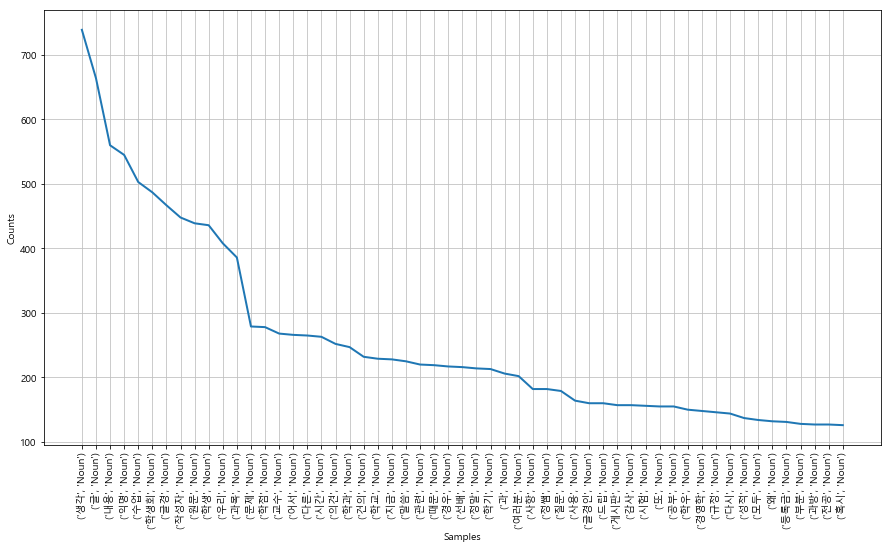

In [554]:
plt.figure(figsize=(15,8))
ko.plot(55)     # Plot sorted frequency of top 50 tokens
plt.show()

## 한 번 딥러닝 띄어쓰기를 써보자

In [47]:
from pykospacing import spacing
spacing("김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다.")

Using TensorFlow backend.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


"김형호 영화시장 분석가는 '1987'의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 통계 프로그램 R과 KoNLP 패키지로 텍스트마이닝하여 분석했다."

In [68]:
results = []

In [81]:
a = '학생회가 첫 예산팀과의 미팅 관련 보고를 올린지 약 두 달이 지났네요. 첫 보고 이후에 학생회와 예산팀의 미팅이 진행되어 학과 학생들의 목소리가 여러 번 전달 되었는지 여쭙고싶네요! 학과의 많은 일들에 정말 수고가 많으신 것 알고있습니다. 그런데 등록금과 관련해서 현재 학생회가 어떤일을 하고 있는지 궁금하여 글 올려봅니다. 후배님들에게 드리고 싶은 말씀을 적어봅니다.'

In [87]:
import re
re.split(r'\!|\?|\.\s*', a)

['학생회가 첫 예산팀과의 미팅 관련 보고를 올린지 약 두 달이 지났네요',
 '첫 보고 이후에 학생회와 예산팀의 미팅이 진행되어 학과 학생들의 목소리가 여러 번 전달 되었는지 여쭙고싶네요',
 ' 학과의 많은 일들에 정말 수고가 많으신 것 알고있습니다',
 '그런데 등록금과 관련해서 현재 학생회가 어떤일을 하고 있는지 궁금하여 글 올려봅니다',
 '후배님들에게 드리고 싶은 말씀을 적어봅니다',
 '']

In [88]:
results = []

In [44]:
df['spaced제목과내용'] = df['제목과내용'].apply(lambda x: spacing(x))

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 돕바 주문 오류에 대하여 문의드립니다.. 돕바 주문에 오류가 생겨 배부가 늦어진 것은 백번 양보해 이해합니다. 다만, 실수로 인해 잘못 제작된 돕바들과 그로 인해 새로 제작을 주문한 돕바들에 대한 비용은 정확히 어떻게 되는건가요? 저희가 납부한 학생회비에서 빠져나가는 것인가요? 추가적 돕바 주문으로 인해 발생한 예산 문제에 대하여 학생회 측에서 답변 주신다면 감사하겠습니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 도대체 돕바는 언제쯤 받을 수 있나요?. 10월 17일에 "업체로부터 명확한 답변을 받은 후, 공지로 안내해드리도록 하겠습니다"라고 하셨는데, 2주가 넘게 기다렸음에도 상황이 어떻게 돌아가고 있는지 알 수가 없네요. 11기 학년대표님께서 17일에 "현재 업체와 문제 해결에 힘쓰고 있으며 해결되는대로 바로 연락드리겠습니다."라고 카톡으로 말씀해주셨는데, 연락이 안 온 것이 아직 해결이 안 되어서인가요, 아니면 다른 이유가 있는 것인가요? 게시글을 작성하지 않으려고 하였으나 도저히 추워서 못 견디겠습니다. 제 돕바는 언제쯤 받을 수 있나요?.
  warnings.warn('One sentence can not contain more than 198 chara

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 시험기간 철야 시간 때 주의해주시면 감사하겠습니다.. 시험기간 때마다 국제관에서 철야로 공부하는 친구들이 많은 걸로 알고 있는데요. 당연히 친구들이랑 같이 공부할 수 있고, 공부하다가 머리 식힐 겸 이야기하고 장난칠 수도 있다고 이해합니다. 그렇지만, 국제관에 3~4명만 있는 거 아니고, 세미나실마다 공부하는 다른 학생들이 있고 열람실에서도 공부 중이에요. 어떤 과목 어떤 파트를 공부하는 지 다 들릴 정도로 크게 공부 내용을 이야기하거나, 심지어 국제관 뛰어다니면서 장난치고 소리지르는 건 상식을 벗어난다고 생각합니다. 완전히 조용한 상태에서 공부하고 싶었으면, 중도나 독서실에서 공부했을 겁니다. 어느정도의 소음이 있을거라고는 예상했지만, 위의 경우에 해당하는 상황이 국제관에서 있을 거라고는 생각하지 못했습니다. 서로가 서로를 배려할 수 있으면 좋겠습니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 교환학생 학점인정서 관련. 안녕하세요. 교환학생 학점인정서 관련 문의드립니다. 이번주 중으로 대부분의 수업들이 종강합니다. 먼저 한 학기동안 학생들 복지위해 힘써주신 행정실 직원 및 조교님들 정말 감사드립니다. 질문의 요지는 제가 교환을 가고자하는 학교의 수강

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : Business Practicum October Project 평가회 관련해서. 안녕하세요. Business Practicum 수강생입니다. October Project 를 수행하면서 과제에 대한 안내와 변경사항에 대한 공지가 원활히 진행되지 않아 답답하고 아쉬운 생각이 있었습니다. 그렇지만 평가회와 관련해서는 단 한번도 공지되지도 언급되지도 않았던 부분입니다. 저희가 공지받았던 내용은 박선민 교수님, 학과장님 그리고 예술의 전당 관계자가 포스터 전시에 참여할 거라는 내용과 평가는 해당 3인과 더불어 수강생들끼리 피드백 교환 및 평가가 이루어진다는 것이었습니다. 교실이 아닌 로비에서, 그것도 관계자 뿐 아니라 수강하지 않는 글경인들 또한 참관하며 '평가위원'으로 참가한다는 사실은 언제 정해졌고, 언제 수강생들에게 고지될 예정이었나요? 심지어 오늘 연극 관람이 끝난 후 이번 과제와 다음 과제에 대한 학과장님 안내에서도 글경 학생들 역시 평가회에 참여한다는 말은 전혀 없었습니다. 수업과 평가는 교수 재량의 영역일 것입니다. 다만 수업 진행 과정에서 학생들에게 적절히 그 내용이 공지되거나 공유되지 못하는 점은 아쉬움으로 남으며, 예술학과 학생들도 수강하는 과목에서 어떠한 이유로 글경 학생들에게 평가위원의 자격이 부여되는 지 궁금합니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 국제관 열람실 내 노트북 이용(타이핑) 관련. 며칠 전 과방에서 신입생으로 보이는 몇 명이 "열람실에서 노트북으로 카톡을 하고 있는데 옆사람이 하지 말라고 했다, 그래서 짜증났다" 라며 대화하는 말을 들었습니다. 친분이 없고, 또 제가 고학번이라 면전에서 말하면 모르는 선배의 꼰대질이라 느껴질까봐 익명을 빌어 싸클에 올립니다. 같이 대화하던 친구들 모두 열람실 내에서는 타이핑 및 마우스 클릭이 금지라는 것을 모르는 듯 했습니다. 국제관 열람실은 물론 중앙도서관 일반열람실 등 '노트북열람실을 제외한 모든 열람실' 내에서는 타이핑, 마우스 클릭 모두 금지입니다. 타이핑 소음이 본인에겐 사소하게 느껴질 수 있으나, 이에 민감한 사람들이 많습니다. 그런 분들이 공부하러 오는 곳이 열람실이고요. 국제관 열람실은 수십 명의 학우가 함께 사용하는 공간이고, 타과생들도 함께 사용하는 공간입니다. 민폐 부리지 맙시다. 노트북이 필요하다면 1층, 지하2층, 지하3층 라운지 및 과방에서 마음놓고 이용하면 됩니다. 아니면 좀 더 부지런해져서 세미나실을 대여하든지요. 열람실 출입문 및 벽면에 노트북 사용금지에 대한 안내문이 있었던 걸로 기억하는데, 보아하니 전달이 부족했나 봅니다. 많은 사람들이 집중을 목적으로 함께 사용하는 공간이니만큼, 확실한 공지 그리고 적발 시 퇴실 등의 적절한 조치가 필요하다고 생각합니다. TPO에 맞게 행동하는 글경인이 됩시다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-pack

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶지난 8년간의 불통(不通). 안녕하세요, 이번에 글로벌경영 간담회가 있을 것이라는 얘기를 듣고 글을 작성하게 되었습니다. 제목을 약간 강하게 지었습니다. 학과장님이 바뀐 뒤라서 이번에는 어떻게 될지 모르겠습니다만, 이번 간담회가 좀 더 "생산적으로" "의미있게" 이루어졌으면 하는 바람에서 솔직하게 여과없이 얘기해보려고 합니다. 현선해 학과장님이 계실 때도 간담회를 몇차례 가졌었습니다. 그리고 결론적으로 말해서 그 간담회들은 전부 "간담회"가 아니라 예상한대로 일방적인 "설명회"였습니다. 서양사와 4학년 전공 수업에서 나왔던 컨닝사건, 2015년 장영봉 교수님 아이코어 사건, 그리고 작년까지 글경 수업을 맡아오셨던 이은주 교수님 수업에서 터진 일련의 사건들, 그리고 항상 얘기가 나오는 커리큘럼과 교강사의 자격 문제 등이 터질 때마다 항상 그랬듯이 "간담회"가 열렸습니다. 간담회가 열리게 된 과정과 간담회 현장의 분위기는 참여해보신 분들은 아시겠지만 학과장님의 일방적인 주도로 모든 사안이 진행됩니다. 자유롭게 얘기해도 좋다는 말이 있었지만 그러한 말이 나왔다는 것이 이미 학생들이 정말로 자유롭게 의견을 개진할 수 있는 때가 아닐 정도로 분위기가 심각했음을 뜻합니다. 학과장님의 태도는 우리가 소위 말하는 "답정너"라고 할 수 있었습니다. 학생들과 함께 답을 구하러 오신 것이 아니고 이미 답을 준비해오신 뒤에 통보를 하러 오신 상태였습니다. 작년 아이코어 일로 열리게 됐던 간담회에서는 현선해 前학과장님께서 "Operations 수업을 4학년 단독 수업으로 올리고, 본인이 아이코어에 참여해서 모든 사안을 해결하겠다"고 말씀하시며 "내가 참여할 것이기에 아주 힘든 아이코어"가 될 것이다고 호기로운 

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 필수커리큘럼 교양강좌 수강에 대해 건의합니다. 안녕하세요! 우선 항상 학과를 위해 힘써주시고 학생들을 적극적으로 지원해주시는 학과장님과 모든 분들께 감사드립니다. 다름이 아니라, 오늘 공지된 필수 커리큘럼 교양 강좌 변경에 대해 건의할 사항이 있어 이렇게 글을 쓰게 되었습니다. 우리 학과는 감사하게도 글로벌경영학과 학생들이 더 질 높은 교양 수업을 들을 수 있도록 전용 교양 수업들이 개설되어있습니다. 특히 몇몇 교양 수업들은 교수님들과 수업 내용까지 매우 좋아 학생들도 만족하고 수업을 수강할 수 있습니다. 하지만 학생들의 과목 선택권을 단지 글경 전용 교양에 국한하는 것은 조금 강제적이고 비효율적이라는 생각이 듭니다. 첫번째, 원하는 교양 강좌의 수강이 제한되는 경우가 많습니다. 특히 기인사나 의사소통 등 몇몇 교양 영역을 제외한 타 영역들은 이수해야 하는 학점이 각 영역당 2~3학점으로, 한 과목을 수강하면 충족되는 영역들이 대부분입니다. 이때 타과 학생들은 각자의 관심 분야나 자신의 일정에 맞는 과목을 직접 선택하여 듣는데, 전용 교양 수업이 개설되어있다는 이유만으로 다른 모든 선택지를 없애야한다는 것은 매우 비효율적이고 개인의 성향이나 관심사를 고려하지 않은 방침이라고 생각합니다. 딱 한 과목씩만 수강할 수 있는 영역이고 신청가능 학기가 제한되어 있는만큼 관심있고 좋아하는 분야에 대한 수강권 또한 보장되어야 합니다. 두번째, 학생들의 시간 활용이 제한됩니다. 이는 첫번째 사유의 연장선으로도 생각할 수 있을 것 같습니다. 특히 이번 2학년의 경우 전공과 교양필수 수업이 대부분 1교시로 설정되어 멀리서 통학하는 많은 학생들이 일주일에 3번 이상 1교시 수업을 

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 간식 배부받을때 아쉬웠던 점. 우선 간식 지원해주시고 도움 주신 모든 분들께 감사드립니다. 다름이 아니고 오늘 간식 배부받을 때 아쉬웠던 점이 있어서 글을 올립니다. 1. 배부를 기다리며 강의실 앞에 서있었는데 너무나 시끄러웠습니다. 경비아저씨께서 1차로 주의주시고 민쌤도 지나가시면서 2차로 주의를 줬음에도 불구하고 복도가 떠나가도록 소리치고 웃고, 심지어 고함까지 지르는 모습을 보며 놀랐습니다. 옆에 행정실도 있고, 안에 수업중인 학생들이 있는데도 전혀 개의치 않고 떠드는 모습에 제가 다 불안했습니다. 2. 일부 몰상식한 학생들이 새치기를 하더군요. 30분 전부터 지켜봤는데 줄 앞부분 (특히 복도를 가르지르며 줄이 꺾이는 부분 )에 사람이 10~20명 가까이 붙었습니다. 복도 한가운데라 사람들이 오갈 수 있도록 길을 내주어야 함에도 불구하고 오히려 친구라고 자연스럽게 끼어드는 모습을 보며 같은 글로벌 경영학과 학생이 맞나 싶을 정도로 놀랐습니다. 심지어 뒤에 있던 친구가 왜 새치기를 하냐고 물어봄에도 장난스럽게 웃어넘기는 모습을 보며 정말 실망스러웠습니다. 훨씬 이른 시간에 와서 뒷쪽에 줄 서 있던 학생들이 피해를 입게 되는건 생각하지도 않나봅니다. 다른 학생들이 말을 안하니 못봤다고 생각하는 것 같은데, 말을 안 할 뿐이지 다 보고 있다는 걸 알아주셨으면 합니다. 앞으로는 이런 일이 없도록 주의해주셨으면 좋겠습니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacin

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 영은타운 B동 모기 방역 요청. 이제 11월 중순을 넘어 곧 12월달을 맞이하는 시점인데 아직도 모기가 있다는 것은 진짜 문제가 있는 것 같습니다. 따라서 영은타운 B동에 모기 방역을 요청합니다. 그리고 각 방의 방충망 시설도 문제가 있는 것 같은데 한번 교체하는 것도 방안이 될 수 있다고 생각합니다. 마지막으로 윤반장님께서 가끔 1층 문을 열어두시는데 제발 그러시지 말라고 당부해주시길 바랍니다. 외부인 출입 금지에 그렇게 민감하시면서 새벽에 문은 굳이 왜 열어두시나요. 감사합니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 졸업생 인터뷰, 재학생 인터뷰를 보고싶어요.. 안녕하세요, 이제 졸업이 얼마 남지 않게 된 학우입니다. 예전부터 글로벌경영의 비전에 공감한 선배님, 동기, 후배들의 삶의 모습이 궁금했었습니다. 재학생 및 졸업생 인터뷰를 통해 많은 친분을 나누지 못한 분들의 대학생활과 철학을 들으며 많은 동기와 교훈을 얻었습니다. 다만, 언젠가부터 인터뷰가 올라오지 않아 아쉬움이 듭니다. 학생회가 많은 노고를 알고 있습니다만, 부탁드리고 싶어서 건의사항에 글을 남깁니다..
  warnings.warn('One sentence can not contain mo

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 3학년 아이코어 과목들에 대해서.... 첫째로는 시험과 아이코어에 관한 피드백을 해줬으면 한다는 것입니다. 지금 재무 교수님은 아이코어 성적과 기말고사 성적을 금요일에 올려준다고 하셨는데, 재무 교수님을 제외한 세분은 기말고사나 아이코어 프로젝트에 관한 어떠한 언급도 없으십니다. 이대로라면 아이코어 프로젝트나 기말고사에 대한 피드백 없이 점수만 딸랑 나오게 될 것 같은데 이는 문제가 있다고 생각합니다. 한 학기에 걸쳐서 공부한 내용과 이주일에 걸친 프로젝트를 어떠한 피드백도 없이 점수만 그저 받는건 학비를 내고 수업을 듣는 학생에게 매우 무례한 행동이라고 생각합니다. 심지어 일반 교양 과목이나 아이캠 수업 같은 경우에도 시험 성적, 답안, 평점 범위 등을 알려주는데, 전공과목들이 어떠한 상세한 설명도 없이 피드백을 해주지 않고 성적만 던져주는 경우가 많았습니다. 특히 오퍼레이션 같은 경우는 중간고사 성적이나 문제에 대한 풀이도 없었고 수업시간에 다루지 않은 내용을 평가해서 자기가 어떤 성적을 받게 될 지도 잘 모르는 경우가 많습니다. 아이코어 프로젝트와 기말고사 끝난지 이주가까이 지났는데 가장 마지막에 시험을 본 재무 교수님만 이번주 금요일에 성적을 올려주신다는 것을 보면서, 다른 교수님들은 대체 뭘 하시느라 바빠서 시험도 빨치 치고 아직까지 시험에 관한 어떠한 언급도 없으신가 하는 궁금증이 생깁니다. 최소한 이번주 금요일에 성적이 GLS에 공시되기 전에 학생들이 자신의 성적과 평가를 알 수 있게 해주는 것이 교수님들이 학생들에게 해주는 최소한의 예의가 아닐까 생각합니다. 두번째로는 아이코어 프로젝트에 관한 내용입니다. 2년 반동안 수업을 통해 배운 것들을 아이코어 프로젝트를 통해

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶제 2차 간담회 상정안건 건의글: 수강 과목의 잦은 변동과 수강 가능여부에 관하여. 안녕하세요, 저는 아래 글쓴이와는 다른 고학년 학생입니다. 저 글을 쓰신 분의 생각에도 어느 정도 동의하여 처음에는 댓글을 달려 했지만, 제가 요구하는 부분이 저 글을 쓰신 분의 요구사항과는 비슷하지만 또 차이가 있어 혼란을 피하고자 저도 새 글로 글을 쓰게 되었습니다. 저의 건의사항을 말씀드리자면, 수강 과목의 잦은 변동에 대해 지적하고 싶었고 수강 가능여부 역시 논하고 싶습니다. 이 생각을 하게 된 계기가 앞 글쓴이와 마찬가지로 Business Statistics(편의를 위해 이하 스탯으로 적겠습니다)과 관련되어 있습니다. 저는 3학년 인데요, 제가 2학년이던 지난 2014년에 저희가 한 학년을 시작할 무렵에는 분명히 스탯 과목이 1학기에 원 과목 하나, 2학기에 투 과목 하나 이렇게 두개가 개설될 것이라고 하였습니다. 그런데 1학기가 끝나갈 무렵, 수업을 담당하시던 이건창 교수님께서 갑자기 수업 중 다음학기는 안하겠다고 하시고, 현선해 학장님께서도 multiple regression 까지 한 학기에 다 배웠으니 투 과목이 없어도 한 학기 수업만으로 충분하다고 하시며 2학기 예정이던 수업이 갑자기 사라졌습니다. 그렇지만 제가 아는 선은 2012년과 2013년 상황인데, 이때는 각각 Statictical Analysis for Business(이건 정확한지 모르겠네요)와 Econometrics 라는 이름으로 수업이 개설되었는데 일학기 수업 이학기 수업 모두 존재하였습니다. 상식적으로 저희 학년만 한 학기 만에 수업을 소화할 수 있다는 것은

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 국제관 열람실 좌석 질문. 안녕하세요, 저는 이번에 입학한 15학번입니다. 국제관 열람실에는 매일 8시에 가도 자리가 많이 맡아져 있더라구요. 선배님들께서 매일 아침 그 시간대에 오셔서 자리를 맡고 가시는 건 아닌 것 같은데, 혹시 국제관 열람실도 정해진 지정석이 있는건가요? ㅜㅜ 아니면 관련해서 관리하는 부서가 따로 있는 것인지 궁금합니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 등록금/수강과목 관련해서 글 씁니다.. 지금까지 다닌 모든 학기를 통틀어 가장 정신없는 개강 첫 주를 보내고 꼭 짚고 넘어가고 싶은 점이 있어 글 남깁니다. 1. 우리과 등록금이 어떻게 산정되었는지 알고 싶습니다. 아시다시피 우리과 등록금은 약 540만원으로 타 학과의 1.5배 정도입니다. 공대보다 비싸고 의예과랑 비슷한 수준이며, 글로벌경제학과보다도 몇 십만 원 비쌉니다. 공대는 실험으로, 의예과 역시 실험에 필요한 기구, 시신기증 비용 등이 든다고 하지만 아무리 고민해봐도 우리과 등록금이 이렇게 비싼 이유를 찾을 수가 없었습니다. 특히 거의 모든 면에서 비슷한 글로벌경제학과보다도 높은 점은 이해가 되지 않습니다. 입학 후 등록금이 너무 비싸다는 말을 드렸으나 '대신 장학금을 많이 받

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 기숙사 관리비 관련. 2014년 2학기 크라운빌 C동 기숙사 입실 당시 관리비를 입금하라 하여 관리비를 입금했었습니다. 그 때 6개월치 관리비를 선입금 하라고 해서 왜냐 물어보았더니 퇴실 후 남은 2개월치 관리비를 환불 해 주겠다는 답변을 받았습니다. 하지만 이제와서 보니 2개월치를 돌려준다는 말이 없네요. 어떻게 된건지 아시는 분 있으면 알려주세요. 부탁드립니다. 6개월치 총 (1방당) 312,000원을 납부하였고 2개월치 104,000원을 돌려받아야 한다고 생각합니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶기숙사 관리비 관련. 안녕하세요 학생회장 황양후입니다. 기숙사 관리비와 관련하여 윤태영 반장님과 이야기를 나누어 보았습니다. 이야기의 결과를 간략히 적어본다면 1. 6개월분 관리비를 선입금한 학생들이 상당수 있다(전화로 통화한 결과 기숙사 거주인원의 1/3 정도가 6개월분을 선입금하였다고 하더군요) 2. 그렇다면 6개월분 관리비를 선입금한 학생들에 한해서, 퇴실 후 남은 2개월분의 관리비는 어떻게 되는 것입니까? 2-1. 1월 중순 가스 공과금 정산이후 환급을 해드립니다. 2-2. 공과금에는 전기, 가스 공과금이 있습니다. - 전기공과금은 가스공과금과는 별도로 청구금액 만큼 따로 입금하

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : Introduction to finance에 관한 건의사항입니다. 다름이 아니라 다음학기에 introduction to finance가 2-2에 추가된다고 알고있습니다! 조금 설레발일수도 있겠지만 이 과목을 business communication을 1학년 전용과목으로 지정한것처럼 2학년 전용 과목으로 지정되었으면 해서 글을 쓰게 되었습니다.... 혹시라도 이미 파이낸스 들으신 분들이 intro to finance를 듣는건 파이낸스를 처음 듣는 2학년 학우들에게 불공평하다가 생각이 됩니다. 아무래도 예민한 토픽일수 있어서 익명으로 쓰게된점 사과드립니다. 감사합니다!.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 3학년 아이코어 수업듣는 타과학생들. 문득 시험공부하다가 수업시간에 엿들은 대화가 생각나서요 저번에 한 글경제 학생이 재무교수님께 아이코어를 하지 않는것에 대해서 묻는걸들었는데 교수님께서 타 교수님들과 대화른 해보아야 알겠지만 아이코어를 제외한 기말까지의 성적가지고서만 평가를 하겠다고 들은것 같아서요 확실하지 않아서 이야기 하기가 조심스럽지만 아이코어 과목을 원래 타과생들도 수강할수 있는것인지 또 이런경우에는 어떻게 평가가 되는지 궁금합니다. 만약에 제가들은것이 맞다면 

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 열람실 내 노트북 이용과 관련하여. 요즘 들어 부쩍 열람실안에서 노트북을 사용하는 분들이 많은 거 같습니다. 그런데 노트북을 통해 인강을 보거나 타이핑을 어느 정도 살살 치는 정도의 행위는 이해할 수 있습니다. 그런데 과제를 하러 열람실에 와서 타이핑을 치게 되면 주변에 앉은 사람들에게는 타이핑 소리가 어느 정도 꽤 큰 소음이 됩니다. 뿐만아니라, 맞은편에는 키보드를 치는 그 떨림이 맞은편에 앉은 사람에게 느껴질 정도로 세게 두드리는 분도 있습니다. 예를 들면, 마우스 클릭 대신 노트북 키보드 아래에 있는 걸 이용한다던지, 키보드는 키스킨을 깔고 사용한다던지 하는 식으로 쓰면 어떨까 합니다. 게다가 버젓이 입구에는 마우스 사용을 자제해달라는 문구가 붙어있음에도 불구하고 정말 다른 사람들 신경 쓰지 않고 마우스와 키보드를 자유롭게 이용하시는 분들도 많은거 같습니다. 열람실은 혼자만 쓰는 공간이 아니니, 조금더 주의하고 남을 배려하면서 사용해주셨으면 좋을거 같아서 글을 남김니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : Business Communication 수업 수강대상에 대해 질문드립니다.. 1학년 BC 수업은 다른 학년이 못 듣는다고 알고 있었는데 이런 학년 제

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 3학년 1학기 복학수강신청&2013년 1학기 기숙사 신청. 무슨과목을 해야하는지 궁금합니다 게시판에 올려져 있는 것과 교수님 및 과목명이 상이한 것 같아서요 그리고 너무 오랜만에 수강신청을 하려다 보니 너무 어렵네요 ㅠㅠ 도와주세요! 정확히 무슨 과목을 신청해야 하는 건지 궁금합니다 ~ 그리고 13년도 기숙사 신청을 하고싶은데 아직 신청이 안된건가요 아니면 이미 끝난건가요?ㅠ 공지 부탁드립니다!.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 기숙사에 대한 질문인데요.... 1학년 때 전용기숙사를 다 써서 어디라도 다른 곳에 들어가야 할 것 같은데요 경기도 남부라서 통학이 만만치않을 것 같기도 하고 자취나 하숙은 돈 문제가 조금 클 것 같아서요. 지금 킹고를 눈여겨보고 있어서 질문드립니다ㅋㅋ. 킹고하우스 들어가신 선배님들 계신가요? 지역커트라인이 어느정도나 될까요ㅠㅠ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: Use

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 몇몇 눈살을 찌푸리게 하는 글들이 있네요.. 토론과 이의제기는 충분히 이루어질 수 있다고 생각합니다. 학우분들이 내주신 많은 근거들에 저도 동의를 하고 있구요. 하지만 왜 이렇게 쓸데없는 글, 댓글과 포털에서나 보일만한 저급한 태도들이 익게에 팽배한거죠? 자제해주시기 바랍니다. 이런 글들은 의견이 피력되는데에 나쁜 영향만 미칠 뿐입니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 삭제조치 하지 마세요. 이것도 다 글경인의 목소리 아닙니까.. 익게에 자질구레한 얘기만 쓸꺼면 뭐하로 존재하는데 감히 실명으로 말못할 예민한 문제 꺼내보라고 있는게 이거 아닌가 근데 그런 예민한 거 꺼내고 댓글 막 달리면 삭제하고 숨기고 그것도 결국 다 성장통인데 안그러면 안되나 저 5기인데요 솔직히 이런 조치 보면 남들이 알까 부끄럽습니다. 적응안되구요..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarnin

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 학생회비와 관련하여.. 저는 5기 입니다. 의문사항이 생겨서 이렇게 글을 쓰게 되었습니다. 학생회비를 걷는 목적을 상기시켜주는 글을 확인했습니다. 그런데, 항목 중에 '빵구 및 기타 비용에 대하 유두리 있는 대처를 위함'과 비슷한 항목이 있더군요. 여기서 저는 한 가지 생각을 하게 됩니다. 학생회비가 얼마가 들어왔고, 어디에 얼마가 쓰였으며, 남은 회비는 얼마인지를 공개해야 한다고 생각합니다. 총 MT에 관해서도 동일한 입장입니다. 학생회비는 학생들의 주머니에서 나온 소중한 돈 입니다. 우리 모두가 그것이 어떻게 쓰이고 있는지 정확하게 알 수 있어야 한다고 생각합니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 건의사항(익명) 게시판 글 삭제 조치 알림. 2012년 9월 8일 00시 16분에 '김성훈 학생회장님의 임기 중 최대 오점' 이라는 제목의 게시글이 올라왔습니다. 내용은 이번 학생회 충원 면접에서 배윤하 양을 합격시킨 것이 공과 사를 구분하지 못한 행동이었으며 매우 안타깝다는 것이었습니다. 그러나 댓글이 많아지면서 감정적인 댓글들이 많아지고 학우간 분쟁을 조장할 수 있는 내용이 있기에 임의로 삭제했습니다. 원본 내용은 캡쳐하여 보존되었으며 확인을 원하실 경우 개별적으

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : F학점.... 수강신청일이 코앞으로 다가온 가운데... 잉여로운 4기 학생이 궁금한게 있어서 올림니닷. 작년 2학기 미적분이 F가 떠버렸는데요 이걸 어떻게 처리해야하나 모르겠어서요 ;_; 1. 미적분 F를 걍 냅두면 졸업에 지장이 이쓸까요? 이수하지 않은걸루 처리된다고 아는데... 2. 만약 미적분을 재수강해야한다면 꼭 미적분만 들어야하나요?? 왠지 다시듣긴 무서워서... 이번학기에 6학점..? 씩이나 남아서 혹시 다시 들어야 한다면 들어벌라꼬요. 부디 은혜로운 답변...ㅠ-ㅠ 부탁드립니닷..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 졸업생 선배님들. 작년 5월에 '학생회에게 건의'라는 글을 썼던 사람입니다. 벌써 반년이 지났군요. 그 글에서 건의했던 사항으로 졸업생 선배님들의 수기를 모아 클럽 게시판에 게재하자는 것이 있었는데 그 답변으로 정샘 曰 : 멋진의견 감사합니다♥ 1,2,3,4,6번은 학생회에서 해결하시고, 5번은 내가 책임지고 만들께요~ 여러가지로 바쁘신거 알지만 정샘 약속 지켜주세요~ 사랑해요♡ 기대할게요..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 시험. 시험 볼 때 감독하는 것과 관련해서 건의 드릴 것이 있어서 글을 올립니다 시험칠 때 가끔 감독이 허술한 과목에서 몇몇 학우분들이 핸드폰 혹은 종이를 통해 컨닝을 하는 것을 중간고사 때 보았습니다 물론 그런사람이 소수고 그런 행동이 실제로 성적에 엄청난 영향을 미치지는 않겠지만 시험전까지 조금이라도 더 머리에 집어넣을려고 했던 제가 손해보는 듯하고 억울한 느낌이 들었습니다ㅠㅠㅠ 이 글을 통해서라도 기말고사 때에는 그런 비양심적인 행동을 하는 학우분들이 안계셨으면 합니다.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 그저 의견인데요...... 2학년입니다. 벌써 많은 과목들이 종강을 했고, 한 학기를 하면서 느낀점 입니다... 1학년도 아니고 이제 후배도 있는 2학년인 데, 수업이 재미없고 , 자신이 관심있는 과목이 아니라고, 아침이라 졸리다고... 출첵을 하고 나가거나, 아예 들어오지도 않는 학생들이 있습니다... 스탯수업은 예전부터 아예 교수님도 신경을 쓰지 않으니 출첵만 하고 그냥 가는 학생이 대다수고 시험, 퀴즈 시험지를 나눠주는 날에만 학생들이 모이는 거 같더라구요..... 얼마전에 종강했던 음악사시간은 아예 대놓고 수업시간에 노트북만 한다거나, 뒤에가서 숙면을 취한다거나 수업시간에 많이 안들어오는 학생이 많았

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 요구사항. 안녕하세요 글로벌경영학과 부과대 홍민우입니다. 글을 올린 이유는 다름아니고 단지 필요,요구사항이 있는지 알아보기 위해서입니다. 내용에 제한없이 필요한 점이나 요구하고 싶은 점이 있다면 댓글 달아주세요~:) 예를 들어 (이미 해결된 예지만) ATM을 설치해주세요 프린트메니져를 설치해주세요- 등과 같은 시설이나 이용측면에서 필요한 점 있으시면 적어주세요^^.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 크라운빌공사....................... 공사를 왜 이렇게 아침부터 하나요... 조금이라도 더 자고 싶어서 한시간동안 어떻게든 버텼는데 제 머리에 대고 못을 자꾸 박는 것 같아서 도저히 더 잘 수가 없어요 공사를 하는 건 어쩔 수 없다고 해도 최소한의 배려로 아침부터 시작하진 말았으면 합니다 진짜 못 박는 소리로 인한 스트레스가 상상을 초월하네요 사람이 버젓이 살고 있는 건물에 지금 일학기때부터 몇개월 째 못질을 하는건지.. 다음부터 이런 공사는 가능하면 방학 때 했으면 좋겠네요.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 건의합니다!. 안녕하세요. 영은타운 살고 있는데요 . 하나 건의 할께 있어서 올립니다. 현재 제가 영은타운 B동에 살고 있는데 굴에 쓰레기가 많습니다. 그냥 종이 같은 일반 쓰레기라도 기분이 안좋을 꺼같은데 음식물 쓰레기 (컵라면 먹은거)같은 쓰레기가 진짜 한 2주일은 후딱 넘게 있던것 같습니다. 벌레 너무 싫어하니깐 그런건 좀 밖에다 버리셨으면 합니다. - 4기 박정규.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 익명게시판 글 삭제 조치 및 안내. 2011년 5월 27일 0시 40분 '생일 파티 한번 거하게 하시네요' 라는 제목으로 올라온 게시글이 올라왔습니다. 주 내용은 생일파티가 너무 시끄러웠다는 것과 생일을 축하한다는 것이었습니다. 그러나 밑에 달린 댓글 중에 학우간 분쟁을 조장할 수 있는 내용이 있어서 임의로 삭제했습니다. 원본은 캡쳐하여 보존되었으며 확인을 원하실 경우 개별적으로 보여드리겠습니다. 해당 댓글을 단 학우께서는 익명게시판 사용 원칙에 관한 4233번 글을 참조해주시기 바랍니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\An

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 술 게임은 술집 가서. 오늘 만의 일이 아니라, 기숙사로 엠티를 온 것 같은 상황이 가끔씩 반복되고 있습니다. 기숙사는 엠티 장소가 아닙니다. 술 게임은 술집 가서 하세요. 야심한 시각 기숙사에서의 음주가무, 고성방가는 성숙한 의식을 갖춘 대학생의 모습과 거리가 멉니다. 기숙사에서 함께 생활하는 글경 가족들을 조금 더 배려하는 자세를 가집시다. * 특히 크라운빌에는 글로벌경제학과 학생들도 있고, 대학원생도 계십니다. 혹시라도 '글경'의 이미지에 좋지 않은 영향을 줄 수 있는 일은 만들지 않도록 더욱 조심합시다. * 기숙사(특히 크라운빌) 생활 관련해서 불편한 점이 있는데도, 혹시 그동안 말 못하고 참고 지낸 분 계시면 제 핸드폰으로 (010-9168-3441) 언제든지 연락주세요~ 개인적으로 도움을 드리든, 의견을 모아서 건물 관리하시는 장 반장님께 건의를 하든, 후배님들이 더욱 쾌적한 기숙사 생활을 할 수 있는 길을 찾아보겠습니다. - 크라운빌 C동 402호 주민, 1기 김성훈 드림.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 저기... 후배님들. 안녕하세요? 저는 2기입니다. 4기 여러분들~대학교 생활은 잘 적응하고 계시나요? 개인적인 경험을 바탕으로 4기 여러분들에게 긴히 부탁할 일이 있습니다. 4기

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 정쌤과 김쌤께 건의드려요~. 안녕하세요, 연우입니다. 그리 큰 건의사항은 아니구요, 오늘 교재 관련 글이 올라왔는데 무심코 1기라고 써있는거 눌렀다가 아맞다, 하고 3기 글을 눌러서 봤어요. 복학생이 생기는 상황에서, 수업 관련 공지는 '학년'으로 표시해주시면 안될까요? 이번에 1기는 2학년, 3학년, 4학년 골고루 퍼지잖아요~ 2학기되면 1학년 복학자도 생길거고.... 특별한 이유가 없다면, 부탁드릴게요~.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 영은타운앞 공사현장. 솔직히 너무 시끄럽지않나요 우리가 기숙사생이고 물론 학교 지원에 의해 들어와 있기는 하지만 그래도 최소한의 배려는 해줘야되는것 아닙니까 일조권 침해는 물론 눈 앞 1m에서 철근,파이프,공사자재들이 날아다니며 그에따른 먼지, 소음등이 매우 심각합니다. 또한, 공사 인부들이 싸우면서 건네는 욕설은 참을 수도 없고 참기도 싫을 뿐더러 왜 제가 돈내고 기숙시설살면서 참아야하는지 그 이유도 모르겠습니다. 공사현장 1m앞에 살고 있는 사람으로써 개무시 당하는 기분이네요 가뜩이나 중도 공사때문에 국제관에 자리맡기도 힘든상황에 시험 1주일전에 기숙사에서 공부좀 하려 했더니 도저히 할 수가 없군요 1. 장비 사용시 작업시간 준수(08

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶학생회비 관련. 매분기마다 혹은 매달 학생회비의 사용내역을 공개해주셨으면 합니다. 우리를 못믿어서 그러는거야, 자기들은 제때 돈 안내면서, 학생회가 행사만들어놓으면 참석도 안하면서 라고 엉뚱하게 열폭하지 마시구요. 학생회비의 공개는 당연한 일이라고 봅니다. 지금 명륜 총학생회장의 공금유용에 대한 사건도 있고 재정의 투명성은 당연히 확보되어야 하는 것이니 내역공개를 충실히 해주셨으면 합니다. 원문내용(작성자:익 명)----------------------------------- 안녕하세요. 얼마전에 보니까 학생회비 2만원 씩 걷던데, 등록금에 포함안되고 그냥 따로 내는건가요? 학생회 운영하려면 재정이 필요하니까 걷는것일 텐데, 이왕 걷는거라면 모든 사람한테 확실히 걷던지, 누구는 내고, 누구는 안내고 하는 상황이 되지 않았으면 좋겠네요. 뭐, 2만원이 학생한테 그렇게 작은 돈은 아닌데, 누구는 내고 누군 안내면 형평성에 어긋나죠! 그리고 작년에 학생회비가 어디에 어떻게 얼마나 사용됐는지 지출내역을 공개하고 학생회 운영에 필요함을 알리면서 걷으면 훨씬 수월하지 않을까요. 내는 학생들도 좀더 수긍할수 있겠구요. 물론 학생회에서 재정관리 잘 하고 있으시겠지만, 아무 정보없이 막연하게 행사에 필요하니 내라고 하니까, 좀 그래서 말씀드립니다..
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not conta

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶과잠 뒤에 필기체로 글경 적어둔거요.. 학생회 입니다 ^^ 그 부분은 최종 주문을 넣을때 다시 한번 시안을 주십니다 그때 최종 확인한 이후에 주문 및 제작이 들어가게 되니 걱정마세요~ 원문내용(작성자:익 명)----------------------------------- 음... 제가 잘못본건지, 클럽에 올라온 과잠 뒤에 글경 필기체로 적혀있는 거요 마지막 administration 부분에.. n 뒤에 혹시 u 붙은 건가요?;;; 아니면 그냥 제가 잘못 본 것인지 ㅜㅜ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶야잠. 성균관 유니브레서ㅤㅌㅣㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 영국식 표기인가 원문내용(작성자:익 명)----------------------------------- 중도에서 갖가지 디자인의 야잠을 보면서 막 설레여요 빨리 우리도 입고픔 ㅋ 근데 얼마전에 sungkyunkwan univresity 라고 오타난거 ㅤㅂㅘㅅ음.......ㅋㅋㅋ 그런거 좀 주의해야 할듯요 ㅋㅋㅋㅋㅋㅋㅋㅋ 하얀색으로 정해졌으면 좋겠다 ㅠㅠㅠ야잠은 하얀색 팔이 진리인뎅ㅠㅠㅠㅠ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.forma

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶자유게시판 만들어주세요. 공감.. 간만에 건의사항 게시판에 건의사항이 올라왔네요 분명 건의사항 게시판인데 뻘글이 넘쳐요 요즘 원문내용(작성자:익 명)----------------------------------- 건의사항도 아니고 딱 자유게시판에 올라가면 좋은 글들이 많네요ㅋㅋㅋㅋㅋㅋㅋ 깔끔하게 자유게시판 하나 만들어주세요ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 꼭 익게 아니어도 괜찮아요ㅋㅋㅋ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶내 마니또도 있는거임???ᄏᄏ. 그건 까페주인이나 심지어 싸이월드 운영진, 네이트 운영진도 확인할 수 없어요~ 원문내용(작성자:익 명)----------------------------------- 익명인사람 누군지 어케 확인하나요? 원문내용(작성자:익 명)----------------------------------- 나한테 연락점 ㅋㅋㅋ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentenc

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶수강신청. 이런건 여기다가 올릴 필요가 없는 글입니다. "건의사항" 이잖아요. 3기들, 건의사항 칸은 항상 익명이라는 이름으로 갈등을 빚은 공간이에요. 본인이 하고싶은 말을 익명의 이름으로 배설하라고 드린 공간이 아닙니다. 혼내는 것은 아니니, 참고하세요. 원문내용(작성자:익 명)----------------------------------- 무플방지위원회 원문내용(작성자:익 명)----------------------------------- 수강신청 망해써요 하하하 즐겁다.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 정쌤. 글로벌 영역 교양에 대해서 질문이요. 저는 2기인데요, 글로벌 영역에서 꼭 듣고 싶은 과목이 있는데 A반 B반 모두 그 과목과 시간표가 겹치더라구요.. 2학기때도 시간표가 안 겹친다는 보장은 없구요 그리고 역대 계절 학기 시간표를 보니 이 과목이 계절에 열렸던 경우는 한번도 없었어요.. 그럼 이건 차후에라도 듣기 힘든 건가요? ㅠㅠ (아이코어 때문에) 거기다 글로벌 영역은 2학년에게 수강인우너 50% 우선배정, 1학년에게 나머지 50%, 3~4학년은 잔여인원 이더라구요.
  warnings.warn('One sentence can not contain more 

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶원래 글쓴 3기 신입생 보세요. 이런 일을 보면 절대 그냥 넘어가지 않는 1기 김나경이라고 합니다. 제가 하고 싶은 말은 짧게 하면 이렇습니다. 지킬 건 지키세요. 부탁드립니다. 정샘이 우리 모두에게 친숙하고 모두에게 잘해주시고 친절하신 건 다들 아는 사실입니다. 하지만 우리가 칭하는 글경의 정신적 지주 '정샘'이시면서도, 본분은 성균관대학교 글로벌경영학과의 행정직원이십니다. 본인의 익명이 보장된다고 그렇게 마음대로 반말을 하시니 보기가 좋지는 않네요. 지금까지의 1, 2기 재학생 중 그 어느 누구도 이런 적은 없었습니다. 이번에 3기 수시 프리스쿨 때 출석률이 좋으면 10만원을 환급해준다는 이야기는 저도 들어서 알고 있습니다. 하지만 이 글을 쓰신 신입생분은 그 환급 제도가 올해에 새로 생긴, 1기&2기 때에 비하면 얼마나 좋은 조건인지 전혀 모르고 있군요. 선배들에게 프리스쿨에 대해 어떤 이야기를 들었는지, 이번 프리스쿨이 3기들에게 어떻게 다가왔는지 까지는 잘 모릅니다. 그렇다고 하더라도 여러분이 오로지 그 10만원을 위해 놀 수 있는 방학 중 2주를 포기해 가면서 프리스쿨을 다녔다고는 생각하지 않습니다. 학교에서 그렇게 하기로 약속을 했다면 분명히 그렇게 해 줍니다. 10만원을 받을 정도로 자신이 열심히 프리스쿨에 출석했다면 언제가 됐든 여러분의 통장 계좌로 들어갑니다. 또한 정샘께서는(3기 여러분들은 신입생이라서 잘 모르시겠지만) 여러분이 어떤 상상을 하시든 그 이상으로 많은 업무를 맡고 계십니다. 글경에서 1년만 지내 봐도 이 사실을 몸으로 깨닫게 되실 겁니다. 익명게시판이 이런 식으로 이용되는 걸 보고싶지 않군요. 당장 사과드리세요. 그리고 앞으로는 이런 일이 생기지

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶재승이 형!. 안녕하세요, 08학번 김혜인입니다. 곧 6일날 출국하구요. 저도 이 생각을 많이 하고 있습니다^^ 후배님들에게 다양한 진로에 대해서 도움을 주기 위한 방법이 꼭 필요하다고 생각하고요. 차후에 켈리스쿨에서 학기가 시작되고 글경 학생들끼리 모일 기회가 생기면 꼭 언급하도록 하겠습니다. 과대님과 부과대님께서 일이 진전이 되시면 꼭 연락 주세요~ 원문내용(작성자:익 명)----------------------------------- 안녕하세요 ^^ 정말 좋은 생각입니다~ 사실 부과대님과 함께 생각한 부분이기도 하고요 지금 구체적인 방안에 대해서 생각중인 부분이니깐요 조금만 더 기다려 주세요~ 핑계아닌 핑계를 대자면 제가 지금 감기가 심하게 걸려서 지금 거의 하루 종일 자고 있답니다 ^^; 약이 좀 세서 그런지 맥을 못 추겠네요 몸을 추스리는 대로 새로운 모습으로 변경할 예정이니깐요 조금만 더 기다려 주세요 ^^; 다시 한번 죄송하다는 말씀을 드립니다 새해 복 많이 받으세요~ 원문내용(작성자:익 명)----------------------------------- 새해 복 많이 받으세요 다름이 아니라 LIFE in KELLEY와 같은 게시판을 만들면 좋겠다는 생각이 갑자기 들어서요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 스펠링 저게 맞나.... 하여간에 켈리 가신 선배 분들이 켈리 생활 좀 전해주시면 매우 좋을 것 같아요! ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\k

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶정치학 학점....??????. 진짜 좀 많이 어이없음.....이건 머지ㅠㅠㅠㅠㅠㅠㅠㅠ 적어도 왜 받았는진 알아야할 거 아냐;;; 원문내용(작성자:익 명)----------------------------------- 저도 이의신청하고 싶어서 시도 몇번 해봤는데 오류가 있다면서 안되더라구요ㅠㅠ 지금 정치학 때문에 우리집 지금 분위기 끝장이예요 연말에 출가해야할 분위기ㅠㅠ 이건 머지ㅠㅠ............... 22222 원문내용(작성자:익 명)----------------------------------- 전 이의신청 하고 싶네요....ㅠㅠㅠㅠ 이건 머지........ㅠㅠ 원문내용(작성자:익 명)----------------------------------- 정치학 시간에 받았던 모든 점수들 - team presentation, participation, 중간고사, 기말고사, 페이퍼, 팀 디베이트 중 저희가 알고 있는 점수라곤 합해서 6 % (맞나요? 그정도) 였던 팀 디베이트밖에 없어요- 기말고사 전 주 정도에 중간고사를 겨우 채점하기 시작했다 그러셨지요;;; 그러신 분이 기말고사 에세이들과 그 많은 페이퍼 (한 사람당 평균 10페이지 정도 되는) 를 다 읽으시고 (...) 꼼꼼히 채점해 주셨는지 하셨다면 어느 기준으로 하신건지...... 대체 알 길이 없습니다 이의신청...까진 아닌데요 그래도...중간에 어떤 어떤 점수를 받았기에 총점이 나왔는지 알 수 있어야 하지 않나요... 실제로 가장 비중이 컸던게 (심지어 점수기준도 명확히 말해주지 않으신) 어떻게 보면 주관적인 채점이 가능한 완전 서술형 essay 였던 중간 기말고사와 페이퍼였는데 말이죠... 설마설마 해서 icampus 에 가봤

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 과방관련. 공지를 띄울 것 까지는 아닌것 같아서 그리고 일종의 건의 이기 때문에 이곳에 올립니다 과방 사용에 관한 글 입니다 지금 과방을 가보시면 아시겠지만 정말 너무 지저분 합니다 대학생인 여러분이 대학생으로서 권리를 요구하기 이전에 대학생으로서의 의무를 얼마나 하고 있는지 한번 생각해 보십시오 의무까지 갈것도 없고 대학생으로서 기본적인 것은 서로 지켜줘야 하는거 아닌가요? 심지어 오늘 과방에는 누가 먹었는 지도 모르는 술병과 술잔이 펼쳐져 있더군요 시험이 끝났거나 또는 시험공부를 하다가 스트레스 받아서 술 마실 수 있습니다 충분히 마실 수 있다고 생각해요 그런데 비닐봉지에 담아서 치우는게 그렇게 어려운 일인가요? 이렇게 몇몇 몰지각한 글경인들때문에 과방에서 음식물 금지같은게 나온다면 그 때 또 대학생인데 너무 한거 아니냐고 말씀들 하실 건가요? 술병을 보고 저야말로 너무 한거 아니냐는 생각이 들더군요 지정 좌석제도 그렇고 이러한 제재들이 나올 때 마다 대학생들한테 너무 하는거 아니냐는 말이 나오는데 정말 대학생 답게 행동들 했으면 합니다 대학생 답게 행동을 하고 대학생으로서 대우 해달라 해야지 정말 무책임하게 행동해놓고 대학생으로 대우만 해달라고 요구하는건 아니지 않나요? 자기가 한 행동에 책임을 질 줄 알아야 진정한 리더가 된다고 생각합니다 그러니 과방을 사용하고 나신 후에 자기 뒷정리는 본인이 하자구요 예를 들어 식사하고나서는 화장실 가서 휴지에 물한번 뭍혀서 닦으면 되고요 연습장 쓰고도 폐휴지함이나 한곳에 모아 두면 되는 거잖아요 책도 한곳에 모아둘 수 있잖아요 어려운거 아니잖아요 서로 조금씩만 배려하면 쉬운 일이잖아요 제발 책임감있는 글경인이 됩시다 -이재승- 덧붙여 시험이 끝난 1기들은

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 글경♥. 폐인차림에 퀭한 눈 ..... 물론 힘들고 스트레스 받긴 하지만... 너나 할거 없이 모두가 열심히 노력하는 모습이 너무 자랑스럽다는 생각이 드네요^^ 글경 들어오기 전까진 제가 이렇게 공부할 수 있을거라 생각 못했는데 ㅋㅋ 글경인이라는 사실이 새삼 자랑스럽습니다 ~ 모두들 너무 힘들겠지만, 얼마 안 남은 이번 학기 조금만 힘내요! 군대/켈리가기 전....이렇게 다 함께 수업 듣고, 시험 준비 할 수 있는 마지막 학기란 생각이 드니까 새삼스레 기분이 묘하네요 ㅎ 어느새 4학기째 ....ㅋㅋㅋ 글경 사랑합니다♥ -건의 사항은 아니지만 익게가 여기밖에 없으므로 ㅎㅎ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶글경♥. 켈리 가는 15명 중에 남자를 찾고 폐인차림처럼 하고 퀭한 눈을 할 정도로 열심히 공부했던 사람을 가려내고 말투가 비슷한 사람을 찾으면.. 누구지?? p.s. 글경에서 조윤주씨가 젤 예쁜듯... 친해지고싶어요~ 원문내용(작성자:익 명)----------------------------------- 폐인차림에 퀭한 눈 ..... 물론 힘들고 스트레스 받긴 하지만... 너나 할거 없이 모두가 열심히 노력하는 모습이 너무 자랑스럽다는 생각이 드네요^^ 글경 들어오기 전까진 제가 이렇게 공부할 수 있을거라 생각 못

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶과티 디자인 선정 건을 보고 느낀 의사소통의 문제점. 안녕하세요 이번 과티 등판 디자인을 총괄한 윤희진입니다. 우선 평소에 학생회와 비학생회간의 소통이 안된다고 생각했던 제가 오히려 그런 상황을 초래한 것에 대해 죄송하고 제가 잘못한 점과 또 우리 과의 운영에 대해 꼭 필요한 피드백을 해주신 것에 대해 감사 드립니다. ^^^ 일단은 과티에 대해 말씀을 드리겠습니다. 과티 등판은 원래 아무것도 없었습니다만 너무 허전한 것 같다는 의견이 많은지라 이왕 교환 할 때, 추가비용(총 4만원)을 학생회비에서 지불하여 등판에 로고를 새기기로 하였습니다. (학생회비로 쓰는 것은 4만원을 과티를 주문한 약 80여명에게 나누어 또 거기서 다시 돈을 걷기가 힘든 현실적인 문제 때문입니다.) 이런 상황에서, 사이즈 문제로 교환시킨 물건(디자인이 아직 안 새겨진)이 중국공장에서 조만간 디자인을 새기는 공장으로 도착할 것이기에 최대한 빨리 디자인을 해서 드려야 했습니다. 하지만 시험기간이다 보니 이것저것 하느라 정신이 없어서 과티 등판 디자인이 새길지 말지를 최근에 결정하게 되었고 디자인은 오늘 MA가 끝나고 나서야 할 수 있는 여건이 되었습니다. 여기서 제가 미리미리 일을 처리 못한 점 죄송하게 하고 또 최소 과티를 주문한 80여분에게 문자를 돌려서 과티 디자인을 도와주실 분을 자원 받았어야 했으나 제가 아는 몇몇 디자인 쪽에 관심있으신 분들에게만 연락을 드려서 도움을 받았습니다. 저희 귀차니즘으로 이렇게 된 점 죄송하게 생각합니다. 그리고 디자인이 마음에 안 드시는 것도 죄송하게 생각합니다. 얼마간의 시간을 들였던 간에 다수가 마음에 안 들면 폐기 또는 수정을 하고 다른 대안을

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 저기요...... 저기요..... 지정좌석제 있잖아요.... 사실 그거 그렇게 크게 문제는 없는거 같은데요...... 그게 우리가 떠드는걸 막을 수 있다고 생각하지는 않아요...... 다들 아시다시피 우리는 가족처럼 친해져있기때문에 누구옆에 앉아도 서먹서먹하지는 않잖아요............. 그리구요........... 조교님이 들어오셔서 떠드는애들 이름 적어가는거요.......... 어디서 많이 들어본거 같아서 생각해봤는데 초등학교때......반장이 떠드는 애들 이름 칠판에 적는거랑 똑같잖아요........... 이건.....대학이 아니고 사립 초등학교로 밖에 보이지 않아요ㅜㅜㅜㅜ 우리는 좀 더 제대로 된 수준높은 교육을 받으로 치열한 경쟁을 뚫고 대학교에 들어온건데....... 조교님이 떠드는애들 이름써가시는거............. 그거 너무 수동적이잖아요......... 그리고 여기저기서 떠들면.....조교님 못찾으실텐데......... 암튼 제가 뭐라고 말 할 처지는 못되지만......... 이거는 좀 아닌거같아서요......물론 교수님이 정하신거긴 하지만...ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ 그냥 그렇다구요..ㅜㅜㅜ 이제는 안떠들겠습니다.... 제발 사립 초등학교 방식만큼은 거두어주세요.ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 charac

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶과티에 대한 건의입니다!. 바람막이는 특별한 디자인 없이 글로벌경영 로고만 삽입한답니다 ^^* 나중에 과티나 후드 맞출 때 이런 방식으로 디자인을 채택하면 의미가 있을 것 같네요. 많은 관심 감사힙니다~ 원문내용(작성자:익 명)----------------------------------- 지금 과티에 대해 말하면 늦은감이 없지 않아 있겠죠? 사실 제가 글을 쓴 이유는 과티 디자인에 대해서 건의할게 있기 때문입니다. 디자인 공모전을 하는건 어떨까요? 공모 신청을 받아서 우리 글경인들의 투표를 통해 디자인을 결정한다면 더 뜻깊은 과티가 될꺼가타요!!!!!!.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶과티에 대한 건의입니다!. 질문인데요~ 글경 로고라면 혹시 노란색.....인가요?? 원문내용(작성자:익 명)----------------------------------- 바람막이는 특별한 디자인 없이 글로벌경영 로고만 삽입한답니다 ^^* 나중에 과티나 후드 맞출 때 이런 방식으로 디자인을 채택하면 의미가 있을 것 같네요. 많은 관심 감사힙니다~ 원문내용(작성자:익 명)----------------------------------- 지금 과티에 대해 말하면 늦은감이 없지 않아 있겠죠? 사실 제가 글

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶흠. 학생회장은 4학기 이상 등록자만 출마가 가능합니다 안타깝게도(?) 지금 4학기 이상 등록자는 1기뿐이고요 혹시 과대를 하고싶으신 2기인가요? 부과대표는 지금 2기에서 해야될 거 같다고 들은 거 같은데 부과대표를 노려보시는건 어떨까요 원문내용(작성자:익 명)----------------------------------- ;;;;;;;;;;;;;;;;좀 뜬금 없지만 1기 선배분들이 경영학과 부대표 나가는 것은 좋지만 저게 혹시 과대 출마도 1기에만 자격이 주어진다는 말씀인가요?.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶흠. 4학기 규율은 어디서 정한건가요~~~??????????? 경영학과 대표 출마 기준 아닌가요~~~? 원문내용(작성자:익 명)----------------------------------- 학생회장은 4학기 이상 등록자만 출마가 가능합니다 안타깝게도(?) 지금 4학기 이상 등록자는 1기뿐이고요 혹시 과대를 하고싶으신 2기인가요? 부과대표는 지금 2기에서 해야될 거 같다고 들은 거 같은데 부과대표를 노려보시는건 어떨까요 원문내용(작성자:익 명)----------------------------------- ;;;;;;;;;;;;;;;;좀 뜬금 없지만 1기 선배분들이 경영학과 부대표 나가는 것은 좋지만 저게 혹시 

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶마무리. ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 왠지 또 2기가 밉보이게 된 것 같군요..ㅠㅠ 원문내용(작성자:익 명)----------------------------------- 저희 과대분께서 올린 글을 보면 '그럼 선배분들이 작년부터 경영학과 학생회의에서 발언권이 없었던건가요? 3학기 재학 뿐이라서요? 선배님이 올리신 글에 4학기 규정이 과 대표 규정인가요 경영학과 부대표 규정인가요;;;;' -> 네 그저 다른 과들이 글경을 이해 못해서가 아니라 학생회 자체의 규정이라고 알고 있습니다 모두에게 적용되는 규정이라면 과대분께서 우리 과의 상황을 설명하는 노력이 부족해서가 아니라고 보는데요 재학생들이 4학기 이상이 안되는 특수한 경우 (글경, 글경제, 자유전공 등 새로 만들어진 과)엔 제 아무리 그 과에서 과대가 된다고 하더라도 학생회의에서는 발언권이 없는 것으로 알고 있습니다 참 기분 나쁘게 글을 쓰시네요. "선배님의 공지나 답변에서 그러한 따뜻함이 보이지 않아서 글을 올립니다 부디 마음을 움직일 수 있는 리더가 되시길;;;;;" 라구요? ㅋㅋㅋㅋㅋ 1기분들도 사람인데.... "정녕 선배님은 2기는 나가면 안 되는 이유를 규정 말고는 설명 하지 못 하시네요" 이런 말을 쓰시는데 어떻게 "선배로서의 따뜻함"을 보여줄 수 있다고 생각하십니까 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 원문내용(작성자:익 명)----------------------------------- 제가 정확히 알지 못 하여서 죄송합니다-_-;;;;;;;;; 무지한 터라 그럼 선배분들이 작년부터 경영학과 학생회의에서 발언권이 없었던건가요? 3학기 재학 뿐이라서요? 선배님이 올리신 글에 4학기 규정이 과 대

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : 사랑하는 글경에게. 익게가 간만에 분위기 애매모호해졌네요~ 샘도 행사가 있을 때마다 '이번에 갈까말까' 전날까지 고민해요. 솔직히 이번 총엠도 갈까말까 고민중이예요. 삼십이 넘은 아저씨가 89,90년생들 모인 자리에 혼자 앉아 있으니 얼마나 뻘쭘하겠어요;;(나중에 세월이 흘러 여러분들이 샘 나이가 되었을 때, 꼭 상상해보시기 바랍니다.) 뻘쭘할까봐 너무 걱정하지 말고 같이 뻘쭘하도록 해요. 함께 뻘쭘하면 그때부터는 뻘쭘이 아니잖아요ㅋㅋㅋ 원래 글경을 맡을 때 샘의 생각은 1기 첫 엠티, 첫 주점까지만 참여하려고 했어요. 선배들이 없는 학과이니까 괜히 싸움이라도 나면 어떡하나 하는 막연한 걱정에 따라갔던거죠. 근데 한 1년 따라가니까 그냥 익숙해지더라구요. (체력이 좀 딸려서 그렇지;;) 샘은 95년부터 대학생활을 시작해서 2004년 대학원 졸업할 때까지 학생신분으로 있었고, 학부 때 과 학생회 생활을 계속 했고, 동아리도 했으니 엠티나 오티나 농활이나 축제나 주점이나 얼마나 많이 갔겠어요. (직장도 대학이라, 엠티 참가 횟수로 세계기록일 듯;;) 몇 번 안간 엠티지만, 한 두번 가보고 엠티는 이런 거야라고 성급하게 판단하지 말고 한 열번 정도 더 가보세요~ 엠티나 농활이나 축제나 주점이나 "함께 하는 맛, 참여하는 맛"에 가는 것 같아요. 엠티가면 솔직히 아침에 돌아올 때 몸도 피곤하고, 몰골도 말이 아니지만 오히려 너무 좋은 숙소에서 좋은 밥먹고 일찍 자고 쾌적하게 있다오면 별로 기억에도 안남아요ㅋㅋㅋ 샘 때는 엠티 다음 날 아침에 라면까지 끓여서 다 같이 먹고, 점심 때가 되어서야 서울로 출발했고 심지어 엠티 뒷풀이까지 하고 집에 들어갔는데 요즘 대학생들은 많이 바쁜 것 같아서 좀 낯설

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶영은타운 관리인 문제입니다.. 저도 동의 합니다. 우리가 아무리 학생이라지만; 아파트에서 도시가스 점검한다고 집에 아무도 없는데 들어오진 않잖아요.. 우리도 엄연히 주민인데 학생이라고 함부로 막 들어오시고 하는 건 자제 해 주셨으면 좋겠습니다. 그리고 방 비밀번호를 굳이 알아야할 이유도 없는 것 같구요.... 원문내용(작성자:익 명)----------------------------------- 완전 맞아요 저번에는 자고 잇는데 열쇠로 문을 따고 들어왓어요 도대체 왜 방에 들어오시는 거죠??????????? 원문내용(작성자:익 명)----------------------------------- 영은타운 관리하시는 분.......... 방에 사람이 옷을 벗고 있는데 노크도 안하고 막 들어오시고, 방학 때 방에 짐 좀 놔두고 갔다고 살지도 않았는데 돈을 내라고 합니다. 그리고 막 방 비밀번호를 바꿨다고 자기 알아야 된다면서 그럽니다. 뭐 저야 같은 남자니깐 크게 문제될 것은 없겠지만, 그래도 이것은 사생활 침해라고 생각합니다.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶영은타운 관리인 문제입니다.. 완전 공감해요... 저는 열쇠를 잊어버려서 말씀 드리고 복사비 드리려고 했는데

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶죄송합니다..ᅮ.ᅳ 죄송합니다..ᅮ.ᅳ. 죄송합니다.,..ㅜ.ㅡ 앞으로는..더욱 조심하겠습니다..ㅜ.ㅡ 저희가 창문 닫을게요....ㅜ.ㅡ 죄송합니다..ㅜ.ㅡ 원문내용(작성자:익 명)----------------------------------- 너무 시끄러운거 아닙니까.. 누군지 몰라서 문자도 못드리고 전화도 못하겠는데 진짜 매일같이 시끄러워서 짜증나네요 당신들때매 다수가 시끄러워서 창문닫고 살아야겠습니까.. 또 그층만 무슨 방범창같은거 안달린거같은데그래서그런가 소리가 바로 옆에서 말하는것처럼 더 크게들립니다.. 창문을 닫고말씀하시던가 조용히 말씀하시던가 해주세요 몇일동안 빡치다가 오늘 참는데 한계를 느껴서 쓰네요 시정하겠다고 답글 달리면 글 삭제하겠습니다.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶죄송합니다..ᅮ.ᅳ 죄송합니다..ᅮ.ᅳ. 헉 지울라고 했는데 댓글달리면 못지우네요... 미안해요앞동 후배님들 제가 요즘할게너무 많아서 부쩍 짜증이늘었어요 ㅜㅜ서운해하시지 말고 배려하는 글경이됩시다~ 원문내용(작성자:익 명)----------------------------------- 죄송합니다.,..ㅜ.ㅡ 앞으로는..더욱 조심하겠습니다..ㅜ.ㅡ 저희가 창문 닫을게요....ㅜ.ㅡ 죄송합니다..

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶영은타운 벌레 문제   -  505호입니다. ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이런멍충이 이거 원래 잇는 시잖아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 원문내용(작성자:익 명)----------------------------------- 바퀴벌레는 진화중 - 샘, 석민 믿을 수 없다, 저것들도 먼지와 수분으로 된 사람 같은 생물이란 것을. 그렇지 않고서야 어찌 시멘트와 살충제 속에서만 살면서도 저렇게 비대해질 수 있단 말인가. 살덩이를 녹이는 살충제를 어떻게 가는 혈관으로 흘려보내며 딱딱하고 거친 시멘트를 똥으로 바꿀 수 있단 말인가. 입을 벌릴 수밖엔 없다, 쇳덩이의 근육에서나 보이는 저 고감도의 민첩성과 기동력 앞에서는. 사람들이 최초로 시멘트를 만들고 집을 짓고 살기 전, 많은 벌레들을 씨까지 일시에 죽이는 독약을 만들어 뿌리기 전, 저것들은 어디에 살고 있었을까. 흙과 나무, 내와 강, 그 어디에 숨어서 흙이 시멘트가 되고 다시 집이 되기를, 물이 살충제가 되고 다시 먹이가 되기를 기다리고 있었을까. 빙하기, 그 세월의 두꺼운 얼음 속 어디에 수만 년 썩지 않을 금속의 씨를 감추어가지고 있었을까. 로봇처럼, 정말로 철판을 온몸에 두른 벌레들이 나올지 몰라. 금속과 금속 사이를 뚫고 들어가 살면서 철판을 왕성하게 소화시키고 수억 톤의 중금속 폐기물을 배설하면서 불쑥불쑥 자라는 잘 진화된 신형 바퀴벌레가 나올지 몰라. 보이지 않는 빙하기, 그 두껍고 차가운 강철의 살결 속에 씨를 감추어둔 채 때가 이르기를 기다리고 있을지 몰라. 아직은 암회색 스모그가 그래도 맑고 희고, 폐수가 너무 깨끗한 까닭에 숨을 쉴 수 없어 움직이지 못하고 눈만 뜬 채 잠들어 있는지 몰라. 바퀴벌레는 영은에 살고 있을지도 

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶글 하나 남깁니다.. 1기입니다 교수님께서 지하철을 타시고 서울까지 오시는지는 몰랐네요. 어떻게 같은 교수님한테 수업을 서울에서 들을 수 있을까 궁금했는데 그렇군요. 작년생각해보면 목요일마다 아침 8시였나? 그때 다같이버스를타고 수원으로 가던 생각이 납니다. 그당시에는 정말 힘들다고 생각했지만 (하루에 몇시간씩 버스를타고 하루종일 수업을 받으니까 하루가 통채로 사라졌었습니다.) 지금 생각해보면 정말 소중했던 시간이고 어쩌면 그렇게 좋으신 교수님께 수업 받을 수 있던 것도 -비록 직접 수원까지 간 것이었지만- 참 행운이었다고 생각합니다. 올해는 심지어 교수님께서 서울까지 오신다니 그것도 지하철을 타시고..... (아마도 수원에서 서울까지 연결되어있는 학교버스를 타시거나 아니면 교수님댁이 서울이셔서 서울에서 지하철을 타시고 오시는 것 같지만...) 정말로 여러분은 행운입니다! 교수님이 항상 웃으시는얼굴로 여러분께 수업하시고, 배우는 과목의 내용도 어렵지 않으니까 그리고 책을 봐도 아주 친절하고 읽기 쉽게 "Oh!" 이런 감탄사까지 나와있어서 책만 봐도 어렵지않고 학점도 잘주신다니까 수업을 대충들어도 된다는 것은 아닙니다. 작년에 들었는데 교수님께서는 연구쪽의 실적으로도 아주 유명하시고 유능하신 분이라고 들었습니다. 수학과가 아닌 학생들을 가르치는 일도, 연구가 아닌 아주 간단한 그런 과목을 가르치시는데 시간쓰시는 일도 어쩌면 교수님으로서는 아주아주 유쾌하신 일만은 아닐지도 모릅니다. 그것도 "지하철"을 타고오신다면 더더욱이요. 만약 교수님께서 한소리하셨다면, 그리고 퀴즈시간을 수업끝에서 앞으로 옮기셨다면 - 그렇게 성격도 좋으시고 항상 웃으시는 분께서- 그것은 정말로 참다참다 못해서 하신 일일 

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶안녕하세요. 2기 황병찬입니다.. 무슨 내용 때문에 이런글이 올라왓는지는 모르겠습니다 하지만 여러분!! 모두가 글경에대한 애정을 조금만 더 가져줬으면 좋겠습니다 진심으로 부탁드립니다 글경과 활동에 적극적으로 참여해주시고 과를 사랑할줄아는 멋진 글경인이 되었으면 하는 바램입니다 원문내용(작성자:익 명)----------------------------------- 안녕하세요. 2기 황병찬입니다. 방금 제가 믿을 수 없는 이야기를 듣고 이렇게 글을 올립니다. 익명게시판에 아주 불미스러운 글이 올라왔다는 이야기를 들었습니다. 처음엔 장난인 줄 알았습니다. 그런데 클럽에 접속해보니 정말 이더군요 ,, 물론 최근 많은 과제와 시험으로 인해서 많은 정신적인 스트레스를 받고 계시다는 것 이해합니다. 저도 한 사람의 글경인으로서 과제의 압박을 받고 , 시험의 압박을 받습니다. 가끔은 정말 힘들어서 다 내팽개쳐 버리고 싶을 때도 있습니다. 하지만 여러분, 여러분은 자랑스러운 글경인입니다. 처음에 이 글을 쓸 때는 이번에 올라온 글이 어떤 면에서 잘못 되었는지 하나하나 지적해 드리려고 했습니다. 하지만 이렇게 글을 쓰다 보니 그 분이 조금은 이해가 가는 것 같습니다. 그렇다고 그 분의 행동을 이해 한다는 것은 아닙니다. 제가 이해한 것은 그 분도 어떨결에 그런 글을 올리셨을 것이라는 이해입니다. 그래서 그 분을 나무라기보다는 조금의 마음 표현만 하고 글을 마치려고 합니다. 여러분 전 정말 글경이 좋습니다, 제가 기숙학원에서 지내던 생활과 비교를 해서 그런 것인지도 모르겠지만 전 지금의 생활이 정말 천국과도 같습니다. 공부를 덜해서, 잠을 더 자서 좋다는 것이 아닙니다. 동기들이나 선배님들과 이야

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶영은타운에서 내 우산 훔쳐간 사람. pockadot제우산도돌려놓으세요 완전비싼우산인데 아니도대체누가가져간겁니까ㅡㅡ 원문내용(작성자:익 명)----------------------------------- 경영관지하3층에서나와1학기를함께시작한소중한내만원이넘는자동우산 훔쳐간사람누구에요 디프리시에이션시작도안한내우산돌려줘 ㅠㅠ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶영은타운에서 내 우산 훔쳐간 사람. 포커닷우산은누가돌려놧네^^ 원문내용(작성자:익 명)----------------------------------- pockadot제우산도돌려놓으세요 완전비싼우산인데 아니도대체누가가져간겁니까ㅡㅡ 원문내용(작성자:익 명)----------------------------------- 경영관지하3층에서나와1학기를함께시작한소중한내만원이넘는자동우산 훔쳐간사람누구에요 디프리시에이션시작도안한내우산돌려줘 ㅠㅠ.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing

C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶과방은...어찌된건가요?ᅮᅮ. 안녕하세요^^ G-innovation입니다. 과방문제같은경우에는 국제관 준공식때문에 3월24일 이후로 미뤄졌었구요^^ (이 사안은 학생회 OT 회의때 나왔던 내용인데, 제가 실수로 회의록에서 빼먹었군요. 죄송합니다ㅜㅜ) 과방문제는 우리끼리 국제관 빈 공간에 마음대로 들어가서 쓸 수 있는게 아니라 학교와의 협조가 필요한 문제라 사실 지금 딱 말씀드리긴 힘들구요ㅜㅜ 적어도 지금까지 과방문제에 대한 논의가 안 나온게 아니라 아직 확실해진게 없어서 말씀을 못드리는 거니까 조금만 더 기다려주세요^^ 그치만 확실하게 말씀드릴 수 있는건 곧 과방이 만들어집니다! (여기까지 쓰고 좀더 확실한 답변을 위해서 정쌤과 통화했는데, 제가 쓰는 중간에 정쌤이 글을 올리셨네요^^; 참고해주세요) 원문내용(작성자:익 명)----------------------------------- 흠흠 과방 추진계획이 과대선거즈음에 활발히 이루어지는듯 하다가 지금은 또 다시 잠잠해진거 같네요.. 이제 슬슬 중간고사도 다가오는 만큼 한 학기의 절반 가까이 지난거 같은데 과방에 대한 소식은 감감 무소식이네요...ㅜㅜ 어떻게 되가고 있는지 알고싶어요!!.
  warnings.warn('One sentence can not contain more than 198 characters. : {}'.format(sent))
C:\ProgramData\Anaconda3\lib\site-packages\pykospacing\kospacing.py:56: UserWarning: One sentence can not contain more than 198 characters. : ▶과방은...어찌된ᄀ

In [45]:
df

,제목,날짜,조회수,내용,댓글수,제목과내용,spaced제목과내용
0,1층 라운지에서 배달시켜 먹지 마세요 [4],2018-12-19,547,배달시켜 먹지 말자고 책상 한가운데에 떡하니 붙어있는데 왜 굳이 거기서 시켜드시는지...,4,1층 라운지에서 배달시켜 먹지 마세요. 배달시켜 ...,1층 라운지에서 배달시켜 먹지 마세요. 배달시켜 ...
1,돕바 주문 오류에 대하여 문의드립니다. [1],2018-11-06,312,"돕바 주문에 오류가 생겨 배부가 늦어진 것은 백번 양보해 이해합니다. 다만, 실수로...",1,돕바 주문 오류에 대하여 문의드립니다.. 돕바 ...,돕바 주문 오류에 대하여 문의드립니다.. 돕바 ...
2,도대체 돕바는 언제쯤 받을 수 있나요? ...,2018-11-03,363,"10월 17일에 ""업체로부터 명확한 답변을 받은 후, 공지로 안내해드리도록 하겠습니...",7,도대체 돕바는 언제쯤 받을 수 있나요?. 1...,도대체 돕바는 언제쯤 받을 수 있나요?. 1...
3,열람실 이용 수칙좀 지켜주세요 ᅲᅲ [7],2018-10-15,501,계속 열람실 자리맡기 등에 대해서 문제가 제기되어왔어서 발권기를 설치한 것으로 알고...,7,열람실 이용 수칙좀 지켜주세요 ᅲᅲ. 계속 열람실...,열람실 이용 수칙좀 지켜주세요 ᅲᅲ. 계속 열람실...
4,글경 카페 글을 캡쳐해서 비방하는 글을...,2018-10-12,1057,저는 총여 관련해서 어떠한 의사표명을 하지는 않겠습니다 그러나 일부 학생들이 소수의...,7,글경 카페 글을 캡쳐해서 비방하는 글을...,글경 카페 글을 캡쳐해서 비방하는 글을...
5,총여 존폐 투표의 정당성에 대해 [262],2018-10-12,2214,좀 전에 어떤 남학우 분이 올려주셨던 글을 왜 지우셨는지는 모르겠으나 해당 학우 분...,262,총여 존폐 투표의 정당성에 대해. 좀 전에 어떤 남...,총여 존폐 투표의 정당성에 대해. 좀 전에 어떤 남...
6,초과학점에 대한 질문 [1],2018-10-10,295,안녕하세요! 초과학점 관련 질문하려고 글 남깁니다. 직전학기 학점 4.0 이상인 학...,1,초과학점에 대한 질문. 안녕하세요! 초과학점 관련 질문하려...,초 과학점에 대한 질문. 안녕하세요! 초과학점 관련 질문하...
7,Consumer Behavior 과목 수강에 관해 [3],2018-08-17,625,주어지는 티오가 너무 적어 매학기마다 CB과목 수강신청을 하는 것이 정말 어렵습니다...,3,Consumer Behavior 과목 수강에 관해. 주어지는 티오...,Consumer Behavior 과목 수강에 관해. 주어지는 티오...
8,Consumer behavior 수업에 관해서 [13],2018-08-08,735,많은 3-4 학년 학생들이 고민하고 있는 부분일거라고 생각을 하는 과목이어서 이렇게...,13,Consumer behavior 수업에 관해서. 많은 3-4 학년 학...,Consumer behavior 수업에 관해서. 많은 3-4 학년 학...
9,등록금에 관한 질문 [7],2018-07-28,603,18학번으로 성균관대학교에 글로벌경영학과에 입학하게된 새내기입니다. 다름 아니라 타...,7,등록금에 관한 질문. 18학번으로 성균관대학교에 글로벌경...,등록금에 관한 질문. 18학번으로 성균관대학교에 글로벌 ...


In [91]:
tokens_ko_new2 = postprocessor.pos(" ".join(results))

ko = nltk.Text(tokens_ko_new2, name='GBA 익명게시판2')

print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()

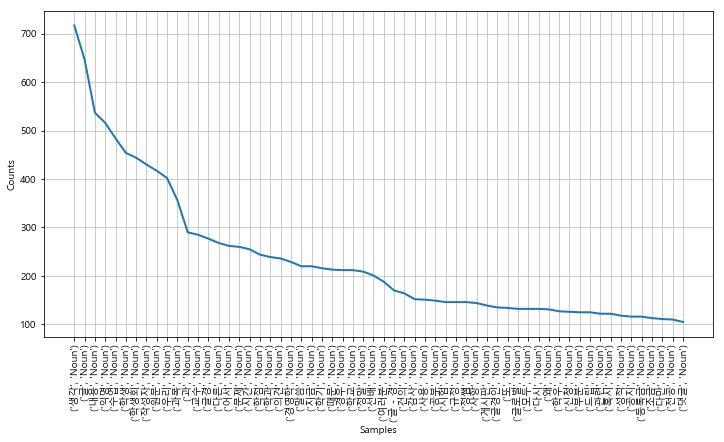

In [93]:
plt.figure(figsize=(12,6))
ko.plot(60)     # Plot sorted frequency of top 50 tokens
plt.show()

In [111]:
df.set_index('날짜', inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 916 entries, 2018-12-19 to 2009-04-05
Data columns (total 5 columns):
제목       916 non-null object
조회수      916 non-null int64
내용       916 non-null object
댓글수      916 non-null int64
제목과내용    916 non-null object
dtypes: int64(2), object(3)
memory usage: 42.9+ KB


In [118]:
spring = pd.DataFrame(columns=['날짜','제목','조회수','내용','댓글수','제목과 내용'])

In [119]:
spring

,날짜,제목,조회수,내용,댓글수,제목과 내용


In [141]:
df.sort_index(inplace=True)

In [378]:
df2009 = df.truncate(before = '2009-03-01', after = '2010-03-01')

In [379]:
df2010 = df.truncate(before = '2010-03-01', after = '2011-03-31')

In [380]:
df2011 = df.truncate(before = '2011-03-01', after = '2012-03-31')

In [381]:
df2012 = df.truncate(before = '2012-03-01', after = '2013-03-31')

In [382]:
df2013 = df.truncate(before = '2013-03-01', after = '2014-03-31')

In [383]:
df2014 = df.truncate(before = '2014-03-01', after = '2015-03-31')

In [384]:
df2015 = df.truncate(before = '2015-03-01', after = '2016-03-31')

In [385]:
df2016 = df.truncate(before = '2016-03-01', after = '2017-03-31')

In [386]:
df2017 = df.truncate(before = '2017-03-01', after = '2018-03-31')

In [387]:
df2018 = df.truncate(before = '2018-03-01', after = '2019-03-01')

In [218]:
df2018.describe()

,조회수,댓글수
count,41.000000,41.000000
mean,446.658537,11.390244
std,396.560122,41.968964
min,142.000000,0.000000
25%,255.000000,1.000000
50%,336.000000,3.000000
75%,486.000000,5.000000
max,2214.000000,262.000000


In [219]:
df2018.sum()

제목       학점 지우개 일정    [2]복수전공 원전ᄀ...
조회수                                                  18313
내용       이번에 4-1에 들어가는 학생입니다. 혹시 학점지우개 관련 일정이 있을가요??예전에...
댓글수                                                    467
제목과내용    학점 지우개 일정. 이번에 4-1에 들어가는 학생입니다. 혹시 ...
dtype: object

In [242]:
content = df2018['제목과내용'].sum()

In [243]:
tokens2018 = postprocessor.pos(content)

ko2018 = nltk.Text(tokens2018, name='GBA 익명게시판2018')

print(len(ko2010.tokens))           # returns number of tokens (document length)
print(len(set(ko2010.tokens)))   # returns number of unique tokens
ko2011.vocab()

9298
2975


FreqDist({('글', 'Noun'): 103, ('학생회', 'Noun'): 59, ('생각', 'Noun'): 52, ('수업', 'Noun'): 42, ('건의', 'Noun'): 41, ('학생', 'Noun'): 37, ('학우', 'Noun'): 36, ('게시판', 'Noun'): 35, ('문제', 'Noun'): 34, ('같은', 'Adjective'): 33, ...})

In [270]:
import collections
counter=collections.Counter(ko2018.tokens)

[i[0][0] for i in counter.most_common(200)]

['생각',
 '학생',
 '학과',
 '글',
 '감사',
 '행정실',
 '과목',
 '다른',
 '팀',
 '학점',
 '건의',
 '학우',
 '경우',
 '선발',
 '글경',
 '세미나',
 '사용',
 '신청',
 '질문',
 '수강신청',
 '문제',
 '익명 - 게시판',
 '익명',
 '게시판',
 '소통',
 '하겠습니다',
 '이용',
 '댓글',
 '학기',
 '어떤',
 '해결',
 '인정',
 '학교',
 '주신',
 '언제',
 '드립',
 '모두',
 '좋겠습니다',
 '아직',
 '교환학생',
 '받을',
 '답변',
 '좋은',
 '공부',
 '지원',
 '문의',
 '많은',
 '차',
 '직접',
 '우리',
 '혹시',
 '있을',
 '전공',
 '같습니다',
 '때문',
 '과',
 '바랍니다',
 '교환',
 '수강',
 '기간',
 '어떻게',
 '이야기',
 '있으면',
 '성적',
 '글로벌',
 '등록금',
 '전화',
 '이러한',
 '관련',
 '자리',
 '쯤',
 '부하',
 '가능',
 '막학기',
 '뿐',
 '이런',
 '마다',
 '명',
 '추가',
 '아닌',
 '어서',
 '심사',
 '꽤',
 '한다고',
 '의견',
 '불편',
 '창구',
 '않습니다',
 '돕바',
 '복수 - 전공',
 '공지',
 '궁금합니다',
 '만약',
 '항상',
 '공간',
 '많은데',
 '학생회',
 '지나',
 '내용',
 '정말',
 '글경인',
 '큰',
 '해하',
 '되었습니다',
 '케이블',
 '일부',
 '장학금',
 '아이',
 '코어',
 '지금',
 '고려',
 '수업',
 '동안',
 '걱정',
 '국제관',
 '이해',
 '열람실',
 '질문',
 '왜',
 '‘',
 '행사',
 '마음',
 '실제',
 '심천',
 '최종',
 '인지',
 '커리어 - 투어',
 '캠프',
 '몇몇',
 '분명',
 '되나요',
 '않은',
 '인적',
 '익명성',
 '누구',
 '아

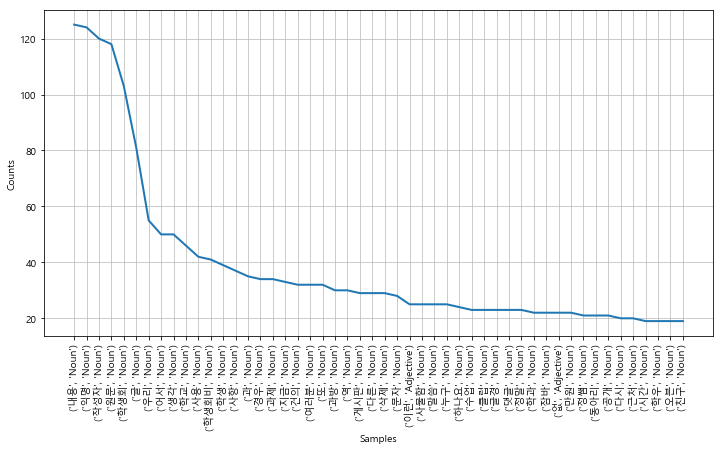

In [227]:
plt.figure(figsize=(12,6))
ko2011.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [258]:
ko2009

<Text: GBA 익명게시판2009>

In [280]:
counter=collections.Counter(ko2009.tokens)

ko2009list = [i[0][0] for i in counter.most_common(200)]

In [282]:
ko2018list

['생각',
 '학생',
 '학과',
 '글',
 '감사',
 '행정실',
 '과목',
 '다른',
 '팀',
 '학점',
 '건의',
 '학우',
 '경우',
 '선발',
 '글경',
 '세미나',
 '사용',
 '신청',
 '질문',
 '수강신청',
 '문제',
 '익명 - 게시판',
 '익명',
 '게시판',
 '소통',
 '하겠습니다',
 '이용',
 '댓글',
 '학기',
 '어떤',
 '해결',
 '인정',
 '학교',
 '주신',
 '언제',
 '드립',
 '모두',
 '좋겠습니다',
 '아직',
 '교환학생',
 '받을',
 '답변',
 '좋은',
 '공부',
 '지원',
 '문의',
 '많은',
 '차',
 '직접',
 '우리',
 '혹시',
 '있을',
 '전공',
 '같습니다',
 '때문',
 '과',
 '바랍니다',
 '교환',
 '수강',
 '기간',
 '어떻게',
 '이야기',
 '있으면',
 '성적',
 '글로벌',
 '등록금',
 '전화',
 '이러한',
 '관련',
 '자리',
 '쯤',
 '부하',
 '가능',
 '막학기',
 '뿐',
 '이런',
 '마다',
 '명',
 '추가',
 '아닌',
 '어서',
 '심사',
 '꽤',
 '한다고',
 '의견',
 '불편',
 '창구',
 '않습니다',
 '돕바',
 '복수 - 전공',
 '공지',
 '궁금합니다',
 '만약',
 '항상',
 '공간',
 '많은데',
 '학생회',
 '지나',
 '내용',
 '정말',
 '글경인',
 '큰',
 '해하',
 '되었습니다',
 '케이블',
 '일부',
 '장학금',
 '아이',
 '코어',
 '지금',
 '고려',
 '수업',
 '동안',
 '걱정',
 '국제관',
 '이해',
 '열람실',
 '질문',
 '왜',
 '‘',
 '행사',
 '마음',
 '실제',
 '심천',
 '최종',
 '인지',
 '커리어 - 투어',
 '캠프',
 '몇몇',
 '분명',
 '되나요',
 '않은',
 '인적',
 '익명성',
 '누구',
 '아

In [284]:
t1 = ['a','b','c']
t2 = ['a','b','c','d','e']
t3 = ['a','b','c','d','e','f','g','h']

In [300]:
[i for i in ko2018list if i not in ko2015list]

['선발',
 '세미나',
 '게시판',
 '소통',
 '이용',
 '댓글',
 '인정',
 '주신',
 '언제',
 '아직',
 '교환학생',
 '좋은',
 '지원',
 '문의',
 '직접',
 '교환',
 '이야기',
 '있으면',
 '글로벌',
 '전화',
 '이러한',
 '쯤',
 '부하',
 '막학기',
 '뿐',
 '마다',
 '명',
 '추가',
 '심사',
 '꽤',
 '불편',
 '창구',
 '않습니다',
 '돕바',
 '복수 - 전공',
 '만약',
 '항상',
 '공간',
 '많은데',
 '글경인',
 '해하',
 '케이블',
 '일부',
 '고려',
 '동안',
 '걱정',
 '국제관',
 '‘',
 '행사',
 '마음',
 '실제',
 '심천',
 '최종',
 '커리어 - 투어',
 '캠프',
 '몇몇',
 '분명',
 '되나요',
 '익명성',
 '누구',
 '아가',
 '줄',
 '인해',
 '발생',
 '공론 - 화',
 '논란',
 '3-4학년',
 '제대로',
 '티오',
 '매번',
 '대해',
 '조정',
 '작년',
 '커리어투어',
 '방학',
 '타',
 '많습니다',
 '부디',
 '경영학',
 '지지',
 '써',
 '교환학생',
 '준비',
 '고자',
 '해외',
 '파견',
 '대학',
 '받',
 '마지막',
 '읽어주셔서',
 '철야',
 '운영',
 '했을',
 '반영',
 '될까',
 '볼로냐',
 '따르면',
 '시험기간',
 '셨으',
 '대부분',
 '먼저',
 '않았습니다',
 '확정',
 '그렇',
 '완전',
 '계획',
 '기회',
 '지급',
 '본',
 '하는데']

In [23]:
with open("NegativeWords_Korean3.txt", "r") as ins:
    negs = []
    for line in ins:
        negs.append(line.rstrip('\n'))

In [24]:
with open("PositiveWords_Korean3.txt", "r") as ins:
    poses = []
    for line in ins:
        poses.append(line.rstrip('\n'))

In [314]:
df['제목과내용'].iloc[0]

'군대 간 친구들 제대로 울려봅시다~!!. 글로벌경영학과 2대 학생회 여러분들, 수고가 많으십니다!!ㅎ 건의사항게시판이 개편되고 나서 첫 게시글이네요ㅎ 지난주 쯤에 이미연 학생회장께 메신저를 통해 개인적으로 말씀드린 사항이지만, 공론화시키고 싶은 마음에 게시판에 글을 씁니다. 최근 정샘께서 군대 간 우리 글경인들의 사진을 여러장 올려주셨습니다. 나라를 지키는 늠름한 모습을 보며 뿌듯해 하실 분들도 계실테고, 보고싶어 눈물을 글썽이는 분들도 계실 것입니다. 또는 머리 빡빡 민 모습이 그저 키득키득 웃기만 하시는 분들도 계시겠죠 :) 우리는 그 친구들이 보고싶을때 그 친구들이 남기고 간 사진을 보기도 하고, 지금 이순간 내 옆에 남아있는 친구와, 지금 내 옆에 없는 그리운 친구 얘기를 하기도 합니다. 또는 그리운 마음을 좀더 적극적으로 표현하고자, 직접 편지를 써서 보내기도 하는데요, 여기서 잠깐. 막상 친구들에게 편지쓸게~편지쓸게~ 해도 실제로 자필로 정성스레 편지를 써서, 직접 우표를 붙여, 편지봉투를 우체통에 집어 넣는 걸 실천하는 사람이 과연 얼마나 많을 지는 의문입니다. 막상 저같은 경우도 편지쓸게~면회갈게~라고 얘기는 많이 하지만 전국 각지의 군부대에 있는 수~많은 친구들과 구두로 한 약속을 다 지키는 건, 사실상 불가능(ㅠ_ㅠ)에 가깝다고 생각하고 있습니다.ㅠ 물론! 이미 편지를 여러통 부친 글경인들도 있을테고, 잠깐 시간을 내어 인터넷 편지를 작성한 분들도 있을 겁니다. 정말 최고죠ㅎ 하지만, 그 수는 소수에 불과할 거라 감히(ㅇㅅㅇ) 예측해 봅니다. 순전히 개인적인 동기로 인해 편지를 쓰는 건, 아무래도 말처럼 쉽지는 않을테니 말이죠. 게다가, 상대적으로 쓰기 편한 인터넷 편지같은 경우는, 전달이 제대로 되지 않는 경우가 상당히 많기 때문에..그닥 추천하고 싶지 않습니다. 그래서, 저는, 학생회의 주도 아래 우리모~두 다같이~ 편지를! 쓰자고 건의하고 싶습니다. 한 사람이 편지 한장 쓰는 것은 큰 노력이 필요하겠

In [335]:
tokens_ko = postprocessor.pos(df['제목과내용'].iloc[0])

ko = nltk.Text(tokens_ko, name='GBA 익명게시글 감정분석')

print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()

764
384


FreqDist({(',', 'Punctuation'): 31, ('를', 'Josa'): 29, ('을', 'Josa'): 22, ('편지', 'Noun'): 20, ('에', 'Josa'): 16, ('.', 'Punctuation'): 16, ('이', 'Josa'): 14, ('도', 'Josa'): 9, ('친 - 구들', 'Noun'): 9, ('~', 'Punctuation'): 9, ...})

In [245]:
def sentimentAnalysis(x):
    
    tokens_ko = postprocessor.pos(x)
    ko = nltk.Text(tokens_ko, name='GBA 익명게시글 감정분석')
    result = 0
    for j in [i[0] for i in list(ko)]:
        if j in poses:
            result += 1
            print(j + '  긍정')
        if j in negs:
            result -= 1
            print(j + '  부정')
    if result >= 1:
        return '긍정'
    elif result <= -1:
        return '부정'
    else:
        return '중립'

In [366]:
sentimentAnalysis(df['제목과내용'].iloc[-14])

완전  긍정
버렸습니다  부정
완전  긍정
썩어  부정
버려서  부정
큰  긍정
갈등  부정


'부정'

In [563]:
df3['감정분석'] = df3['제목과내용'].apply(lambda x: sentimentAnalysis(x))

군대  부정
친구  긍정
군대  부정
빡빡  부정
웃기  긍정
기고  부정
친구  긍정
운  부정
친구  긍정
운  부정
정성  긍정
의문  부정
군  부정
최고  긍정
소수  부정
노력  긍정
군대  부정
군대  부정
기적  긍정
군대  부정
불리  부정
친구  긍정
간단  긍정
간단  긍정
간단  긍정
군대  부정
친구  긍정
기적  긍정
기회  긍정
행복  긍정
지기  부정
친구  긍정
군대  부정
친구  긍정
감사  긍정
군대  부정
빡빡  부정
웃기  긍정
기고  부정
친구  긍정
운  부정
친구  긍정
운  부정
정성  긍정
의문  부정
군  부정
최고  긍정
소수  부정
노력  긍정
군대  부정
군대  부정
기적  긍정
군대  부정
불리  부정
친구  긍정
간단  긍정
간단  긍정
간단  긍정
군대  부정
친구  긍정
기적  긍정
기회  긍정
행복  긍정
지기  부정
친구  긍정
깨끗  긍정
실망  부정
실수  부정
정확  긍정
정확  긍정
노력  긍정
실수  부정
협조  긍정
확실  긍정
진  부정
확실  긍정
확실  긍정
충분  긍정
합의  긍정
실수  부정
협조  긍정
확실  긍정
진  부정
확실  긍정
확실  긍정
실수  부정
협조  긍정
확실  긍정
진  부정
확실  긍정
확실  긍정
솔직  긍정
운  부정
효율  긍정
벌금  부정
위험  부정
효율  긍정
부담  부정
군대  부정
생기  긍정
사랑  긍정
성공  긍정
사랑  긍정
멍하니  부정
지나  부정
우려  부정
경험  긍정
깨끗  긍정
실망  부정
지기  부정
취소  부정
솔직  긍정
어려움  부정
취소  부정
적자  부정
적자  부정
손해  부정
취소  부정
취소  부정
취소  부정
화합  긍정
재미  긍정
솔직  긍정
화합  긍정
지나  부정
도움  긍정
먼지  부정
유용  긍정
절약  긍정
절약  긍정
최대  긍정
지원  긍정
노력  긍정
협력  긍정
노력  긍정
적절  긍정
적절  긍정
부과  부정
냄새  부정
냄새  부정
유해  부정
피곤  부정
냄새  부정
배려  긍정


완전  긍정
공감  긍정
솔직  긍정
불안  부정
불안  부정
부족  부정
경쟁  긍정
상해  부정
부족  부정
경쟁  긍정
상해  부정
스트레스  부정
노력  긍정
자랑  긍정
자랑  긍정
군대  부정
사랑  긍정
스트레스  부정
노력  긍정
자랑  긍정
자랑  긍정
군대  부정
사랑  긍정
군  부정
군  부정
군  부정
웃기  긍정
자유  긍정
영원  긍정
기고  부정
의심  부정
비난  부정
재미  긍정
꿈  긍정
위축  부정
재능  긍정
무시  부정
사랑  긍정
후회  부정
지기  부정
운  부정
영원  긍정
기고  부정
의심  부정
비난  부정
재미  긍정
꿈  긍정
위축  부정
재능  긍정
무시  부정
사랑  긍정
후회  부정
지기  부정
운  부정
영원  긍정
기고  부정
쓰레기  부정
쓰레기  부정
완전  긍정
쓰레기  부정
쓰레기  부정
쓰레기  부정
선택  긍정
선택  긍정
선택  긍정
선택  긍정
선택  긍정
강제  부정
친구  긍정
친구  긍정
친구  긍정
노력  긍정
영원  긍정
기고  부정
의심  부정
비난  부정
재미  긍정
꿈  긍정
위축  부정
재능  긍정
무시  부정
사랑  긍정
후회  부정
지기  부정
운  부정
영원  긍정
기고  부정
걱정  부정
초췌  부정
진짜  긍정
소홀  부정
사랑  긍정
군대  부정
선택  긍정
스트레스  부정
충분  긍정
금지  부정
제재  부정
무책임  부정
질  부정
진정  긍정
배려  긍정
의심  부정
비난  부정
재미  긍정
꿈  긍정
위축  부정
재능  긍정
무시  부정
사랑  긍정
후회  부정
지기  부정
운  부정
영원  긍정
기고  부정
선택  긍정
선택  긍정
진짜  긍정
진짜  긍정
실수  부정
가식  부정
과장  부정
잘못  부정
웃기  긍정
가식  부정
가식  부정
가식  부정
웃기  긍정
심각  부정
심각  부정
실수  부정
가식  부정
과장  부정
잘못  부정
배려  긍정
존중  긍정
진짜  긍정
진짜  긍정
실수  부정
가식  부정
과장  부정
잘못  부정
실수  부정

산만  부정
감사  긍정
소음  부정
특별  긍정
배려  긍정
소음  부정
감사  긍정
해결  긍정
지고  부정
사랑  긍정
꼬  부정
타당  긍정
결석  부정
경험  긍정
부과  부정
감사  긍정
지기  부정
진짜  긍정
감사  긍정
꿈  긍정
실수  부정
운  부정
파문  부정
왕성  긍정
우정  긍정
방치  부정
지나  부정
냄새  부정
오해  부정
부담  부정
부담  부정
강제  부정
군  부정
잘못  부정
불편  부정
불편  부정
걱정  부정
도움  긍정
기여  긍정
발전  긍정
부적절  부정
발전  긍정
부적절  부정
친구  긍정
만족  긍정
안달  부정
인기  긍정
의문  부정
쓰레기  부정
제한  부정
감사  긍정
기만  부정
지우  부정
강제  부정
지우  부정
의문  부정
기회  긍정
가치  긍정
지우  부정
가치  긍정
실수  부정
연루  부정
군  부정
감사  긍정
지하  부정
의문  부정
위기  부정
최대  긍정
오점  부정
정확  긍정
과도  부정
폐쇄  부정
낫다  긍정
확실  긍정
갈등  부정
해결  긍정
부활  긍정
낫다  긍정
갈등  부정
낫다  긍정
오해  부정
해결  긍정
분열  부정
폐단  부정
솔직  긍정
지침  부정
진정  긍정
건전  긍정
기적  긍정
전혀  부정
걱정  부정
특별  긍정
기회  긍정
감사  긍정
유명  긍정
최고  긍정
유용  긍정
화해  긍정
군  부정
감사  긍정
감사  긍정
감사  긍정
감사  긍정
기적  긍정
기적  긍정
피해  부정
솔직  긍정
경험  긍정
충족  긍정
대충  부정
골치  부정
거지  부정
지고  부정
솔직  긍정
무심  부정
솔직  긍정
사랑  긍정
군대  부정
진짜  긍정
의문  부정
자유  긍정
명확  긍정
달성  긍정
지나  부정
활용  긍정
지다  부정
도움  긍정
충분  긍정
주니  부정
지원  긍정
지원  긍정
기적  긍정
전혀  부정
걱정  부정
특별  긍정
기회  긍정
감사  긍정
유명  긍정
최고  긍정
유용  긍정
화해  긍정
군  부정
감사  긍정
사랑 

감사  긍정
우수  긍정
우수  긍정
우수  긍정
우수  긍정
우수  긍정
포기  부정
포기  부정
포기  부정
가능  긍정
포기  부정
충족  긍정
포기  부정
정확  긍정
감사  긍정
최대  긍정
최대  긍정
가능  긍정
가능  긍정
가능  긍정
가능  긍정
무식  부정
기이  부정
군대  부정
가능  긍정
가능  긍정
무지  부정
충족  긍정
명확  긍정
명확  긍정
명확  긍정
제한  부정
감사  긍정
부족  부정
가능  긍정
부족  부정
초과  부정
초과  부정
우수  긍정
감사  긍정
감사  긍정
효율  긍정
감사  긍정
사랑  긍정
감사  긍정
소음  부정
무질서  부정
지나  부정
경고  부정
창피  부정
배려  긍정
빈번  부정
피해  부정
정직  긍정
지하  부정
지원  긍정
도움  긍정
감사  긍정
고함  부정
전혀  부정
불안  부정
친구  긍정
친구  긍정
실망  부정
피해  부정
선택  긍정
완전  긍정
가능  긍정
가능  긍정
가능  긍정
가능  긍정
가능  긍정
가능  긍정
감사  긍정
감사  긍정
당황  부정
소수  부정
감사  긍정
신임  긍정
공감  긍정
신임  긍정
만족  긍정
노력  긍정
만족  긍정
전혀  부정
차별  부정
의문  부정
염려  부정
노력  긍정
전혀  부정
불만  부정
만족  긍정
신뢰  긍정
현명  긍정
후회  부정
불신  부정
염려  부정
운  부정
선택  긍정
성과  긍정
명성  긍정
불편  부정
앞서  긍정
앞서  긍정
제한  부정
반대  부정
만족  긍정
부담  부정
부족  부정
부족  부정
제한  부정
균등  긍정
감사  긍정
전혀  부정
선택  긍정
당황  부정
가능  긍정
가능  긍정
가능  긍정
가능  긍정
부족  부정
가능  긍정
실수  부정
가능  긍정
배려  긍정
고심  긍정
전혀  부정
사나  부정
사나  부정
낭비  부정
강제  부정
실망  부정
지원  긍정
지원  긍정
감사  긍정
질  부정
만족  긍정
선택  긍정
효율  긍정
제한  부정
사나  부정
충족  긍정
선택  긍정


In [564]:
df3['감정분석'].value_counts()

중립    333
긍정    310
부정    277
Name: 감정분석, dtype: int64

In [565]:
df3.to_excel('재합본감정.xlsx')

In [566]:
df4 = pd.read_excel('제목과내용합치기.xlsx')

In [569]:
df4 = df4.sort_values('날짜')

In [570]:
df4.to_excel('제목과내용합치기.xlsx')

In [377]:
df.to_excel('감정분석까지.xlsx', encoding="euc-kr")

In [330]:
'불행' in negs

True

In [332]:
postprocessor = Postprocessor(twitter, ngrams = ngrams,replace = replace,stopwords = stopwords)

In [405]:
df2018['감정분석'].value_counts()

긍정    19
부정    12
중립    10
Name: 감정분석, dtype: int64

In [ ]:
[95,100,118]
[51,74,60]
[36,35,39]
[27,22,16]
[11,8,13]
[19,10,20]
[25,23,29]
[20,10,18]
[19,5,14]
[19,10,12]

## 제목 글씨 깨짐 문제

In [473]:
df1 = pd.read_excel('cyworldAnonymousIncludeContent.xlsx')

In [439]:
df2 = pd.read_excel('daumAnonymousIncludeContent.xlsx')

In [410]:
df3 = pd.concat([df1,df2])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [422]:
import re

In [461]:
df2['제목'][df2['제목'].str.contains('\s\s\s\s')] = df2['제목'][df2['제목'].str.contains('\s\s\s\s')].str[:-6].str.strip()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [469]:
df2['내용'] = df2['내용'].replace(r'\n',' ', regex=True).str.strip()

In [471]:
df2['제목과내용'] = df2['제목'] + '. ' + df2['내용']

In [472]:
df2.to_excel('다음재시도.xlsx')

In [437]:
# df2['제목'] = df2['제목'].apply(lambda x: re.sub('[^가-힣a-zA-Z0-9]', ' ', x)).str.strip()

In [485]:
df1['제목'].replace(r'\xa0', '    ', regex=True, inplace=True)

In [488]:
df1['제목'][df1['제목'].str.contains('\s\s\s\s')] = df1['제목'][df1['제목'].str.contains('\s\s\s\s')].str[:-6].str.strip()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [492]:
df1['내용'] = df1['내용'].replace(r'\n',' ', regex=True).str.strip()

In [493]:
df1['제목과내용'] = df1['제목'] + '. ' + df1['내용']

In [495]:
df1.to_excel('싸이재시도.xlsx')

In [499]:
df1 = df1[['제목','날짜','조회수','내용','제목과내용']]

In [502]:
df2 = df2[['제목','날짜','조회수','내용','제목과내용']]

In [512]:
df1['날짜'] = df1['날짜'].apply(lambda x: pd.to_datetime(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [519]:
df2['날짜'] = '20' + df2['날짜'] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [521]:
df2['날짜'] = df2['날짜'].apply(lambda x: pd.to_datetime(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [522]:
df3 = pd.concat([df1,df2])

In [524]:
df3 = df3.sort_values('날짜')

In [528]:
df3 = df3.reset_index(drop=True)

In [529]:
df3.to_excel('재합본.xlsx')

In [581]:
#df4.sort_values('조회수', ascending=False).reset_index()

,index,제목,날짜,조회수,내용,댓글수,제목과내용
0,298,투표조기종료 반대합니다 [66],2012-11-20,3369,투표조기종료를 반대합니다.,66,투표조기종료 반대합니다. 투표조기종료를 반대합니다.
1,5,총여 존폐 투표의 정당성에 대해 [262],2018-10-12,2214,좀 전에 어떤 남학우 분이 올려주셨던 글을 왜 지우셨는지는 모르겠으나 해당 학우 분...,262,총여 존폐 투표의 정당성에 대해. 좀 전에 어떤 남...
2,435,학생회에 건의합니다. -mt 관련 [47],2011-03-11,2116,MT 준비하시느라 수고가 많습니다. 제가 건의드리는 건 다름아니라 총엠을 못가면 친...,47,학생회에 건의합니다. -mt 관련. MT 준비하시느라...
3,354,켈리갈때는 왜 삼장 안주나요ᅲᅲ? [77],2011-12-01,1995,수능도 끝나고 입시철이 되었습니다. 인터넷에 성균관대학교 글로벌 경영학과를 검색해보...,77,켈리갈때는 왜 삼장 안주나요ᅲᅲ?. 수능도 끝나고 ...
4,14,글로벌 커리어 투어와 관한 몇가지 의문점...,2018-07-16,1743,"안녕하세요, 글로벌 커리어투어에 몇 가지 궁금한 점이 있어서 글을 쓰게 되었습니다....",80,글로벌 커리어 투어와 관한 몇가지 의문점...
5,202,"성균관 대학교의 학생, 글로벌 경영학...",2015-02-12,1617,성균관 대학교 글로벌 경영학과에 재학중인 학생들의 신분은 무엇입니까? 글로벌 경영학...,179,"성균관 대학교의 학생, 글로벌 경영학..."
6,292,다들 너무하시네요... [23],2012-11-21,1378,선거 절차에 어느정도까지는 문제가 있다는 거 알겠어요.. 그래도 한번쯤은 후보자들 ...,23,다들 너무하시네요.... 선거 절차에 어느정도까지는 문제가 있다는 ...
7,371,해도해도 너무 합니다. [65],2011-10-17,1351,이런 제목을 보고 들어오셨으면 당연히 예상하리라 생각합니다. 1학기 때부터 계속 느...,65,해도해도 너무 합니다.. 이런 제목을 보고 들어오셨으면 당연히 예...
8,280,공청회 참가하고있습니다 [47],2012-11-21,1256,공청회 참석하고싶었는데 피치 못할 사정으로 의견을 표출하지 못하신분 ! 의견 댓글로...,47,공청회 참가하고있습니다. 공청회 참석하고싶었는데 피치 ...
9,306,익명건의게시판 폐쇄합시다 [22],2012-11-02,1218,익명건의게시판폐쇄합시다 작금의 사태를 살펴보니 뭔가 익명건의게시판 본래의 목적과 맞...,22,익명건의게시판 폐쇄합시다. 익명건의게시판폐쇄합시다 작...


## 감정분석 추가

In [46]:
df = pd.read_excel('재합본감정.xlsx')

In [227]:
def sentimentAnalysisCount(x):
    
    tokens_ko = postprocessor.pos(x)
    ko = nltk.Text(tokens_ko, name='GBA 익명게시글 감정분석')
    positives = []
    negatives = []
    lengthAll = []
    for j in [i[0] for i in list(ko)]:
        lengthAll.append(j)
        if j in poses:
            positives.append(j)
        if j in negs:
            negatives.append(j)
            
    if len(positives) and len(lengthAll) is not 0:
        posPercent = len(positives)/len(lengthAll)
    else: 
        posPercent = 0
    
    if len(negatives) and len(lengthAll) is not 0:
        negPercent = len(negatives)/len(lengthAll)
    else:
        negPercent = 0
    return pd.Series({'전체추출단어':[lengthAll], '긍정어':[positives], '부정어':[negatives], '전체개수':len(lengthAll), '긍정개수':len(positives), '부정개수':len(negatives), '긍정/전체': posPercent, '부정/전체': negPercent})

In [50]:
sentimentAnalysisCount(df['제목과내용'].iloc[0])

전체추출단어    [[군대, 간, 친구, 제대로, 울려, 봅시다, 글로벌경영학과, 대, 학생회, 여러...
긍정어       [[친구, 지키는, 웃기, 친구, 친구, 정성, 많을, 많은, 지키는, 있을, 최고...
부정어       [[군대, 시키고, 군대, 빡빡, 기고, 없는, 운, 운, 의문, 군, 소수, 군대...
전체개수                                                    424
긍정개수                                                     32
부정개수                                                     19
긍정/전체                                             0.0754717
부정/전체                                             0.0448113
dtype: object

In [242]:
df3 = df3.dropna()

In [243]:
df4 = pd.concat([df3,df3['댓글'].apply(sentimentAnalysisCount)], axis = 1)

In [246]:
df4['감정분석결과'] = df4['댓글'].apply(lambda x: sentimentAnalysis(x))

전혀  부정
해결  긍정
지원  긍정
끌려  긍정
지원  긍정
질  부정
진짜  긍정
늘린  긍정
경쟁  긍정
솔직  긍정
깡패  부정
많은  긍정
않고  부정
만들  긍정
안됩니다  부정
과도  부정
잘못  부정
잘못  부정
지우  부정
실수  부정
가능  긍정
힘들고  부정
힘들면  부정
있던  긍정
불공평  부정
충분  긍정
시킬  부정
불행  부정
없는  부정
합의  긍정
진전  긍정
없는  부정
있다면  긍정
기적  긍정
해결  긍정
공감  긍정
공감  긍정
앞선  긍정
발전  긍정
발전  긍정
앞서  긍정
발전  긍정
많아  긍정
없고  부정
가능  긍정
진전  긍정
전혀  부정
발전  긍정
감사  긍정
혜택  긍정
모르는  부정
함부로  부정
고질  부정
유감  부정
확실  긍정
없어  부정
가능  긍정
확실  긍정
혜택  긍정
증가  긍정
없었습니다  부정
발전  긍정
발전  긍정
진  부정
발전  긍정
있을  긍정
많은  긍정
발전  긍정
있다면  긍정
신속  긍정
감사  긍정
감사  긍정
공감  긍정
좋을  긍정
솔직  긍정
실망  부정
꼰  부정
좋은  긍정
감사  긍정
감사  긍정
공감  긍정
공감  긍정
소홀  부정
큰  긍정
도움  긍정
의문  부정
좋은  긍정
감사  긍정
확신  긍정
있게  긍정
좋은  긍정
감사  긍정
배울  긍정
경험  긍정
있어  긍정
배울  긍정
한계  부정
흥미  긍정
있다면  긍정
완벽  긍정
좋은  긍정
반대  부정
좋은  긍정
의문  부정
가능  긍정
염려  부정
오해  부정
감사  긍정
권한  긍정
안될  부정
않은  부정
큰  긍정
걱정  부정
감사  긍정
만들고  긍정
가볍게  긍정
간과  부정
공감  긍정
공감  긍정
소음  부정
소음  부정
큰  긍정
부족  부정
없는  부정
제한  부정
빠른  긍정
않고  부정
우려  부정
감사  긍정
좋은  긍정
성과  긍정
부당  부정
많은  긍정
감사  긍정
놀란  부정
몰라  부정
무책임  부정
주니  부정
비싼  부정
없고  부정
솔직  긍정
큰  

공평  긍정
공평  긍정
공평  긍정
무례  부정
거만  부정
노력  긍정
노력  긍정
않아서  부정
나쁘다  부정
어긋난다  부정
능력  긍정
낮게  부정
부족  부정
거지  부정
모르는  부정
불공평  부정
불공평  부정
재미  긍정
잘못  부정
더럽고  부정
격하  부정
있으면  긍정
잘못  부정
완전  긍정
없는  부정
잘못  부정
잘못  부정
전혀  부정
완전  긍정
잘못  부정
잘못  부정
잘못  부정
잘못  부정
논란  부정
모르는  부정
만든  긍정
이익  긍정
않았기  부정
편하게  긍정
억울  부정
선택  긍정
편하게  긍정
확실  긍정
없는  부정
안되고  부정
효율  긍정
편하게  긍정
효율  긍정
가능  긍정
확실  긍정
운  부정
잘못  부정
가능  긍정
잘못  부정
처벌  부정
않고  부정
정확  긍정
정확  긍정
모르는  부정
정직  긍정
식인  부정
배운  긍정
모르는  부정
나쁘고  부정
확실  긍정
처벌  부정
가능  긍정
처벌  부정
처벌  부정
정확  긍정
정확  긍정
정확  긍정
살겠다  긍정
공평  긍정
살겠다  긍정
않은  부정
큰  긍정
도움  긍정
공평  긍정
살겠다  긍정
솔직  긍정
노력  긍정
없으면  부정
잘못  부정
공평  긍정
공평  긍정
없는  부정
제재  부정
잘못  부정
처벌  부정
걱정  부정
잘못  부정
확실  긍정
악의  부정
균등  긍정
노력  긍정
균등  긍정
부당  부정
피해  부정
전혀  부정
않던  부정
않은  부정
지고  부정
걱정  부정
앞서  긍정
해결  긍정
해결  긍정
않은  부정
있기  긍정
해결  긍정
있을  긍정
부정  부정
쉽게  긍정
상상  긍정
잘못  부정
지나  부정
논란  부정
않고  부정
당한  부정
않은  부정
잘못  부정
노력  긍정
만든  긍정
비열  부정
악랄  부정
처벌  부정
바랍니다  긍정
지고  부정
잘못  부정
완전  긍정
기회  긍정
의문  부정
과도  부정
미루어  부정
기회  긍정
바랍니다  긍정
기고  부정
바랍니다  긍정
기회  긍정


기회  긍정
없는  부정
공평  긍정
기회  긍정
지지  긍정
지지  부정
지지  긍정
지지  부정
않으면  부정
기회  긍정
기회  긍정
준다  부정
있어  긍정
타당  긍정
가능  긍정
있으면  긍정
많다  긍정
감사  긍정
신성  긍정
갈등  부정
안되는  부정
없으면  부정
불공평  부정
실수  부정
비꼬  부정
오해  부정
바랍니다  긍정
부과  부정
충분  긍정
적절  긍정
미숙  부정
노력  긍정
감사  긍정
불만  부정
성숙  긍정
걱정  부정
지원  긍정
세심  긍정
발전  긍정
발끈  부정
운  부정
웃기  긍정
없는  부정
미숙  부정
갈등  부정
경솔  부정
있어  긍정
잘못  부정
잘못  부정
잘못  부정
잘못  부정
반박  부정
안되는  부정
시킬  부정
모르는  부정
적합  긍정
진짜  긍정
좋겠다  긍정
최고  긍정
공평  긍정
준다  부정
않았습니다  부정
공평  긍정
기회  긍정
않은  부정
무책임  부정
활용  긍정
지지  긍정
지지  부정
부과  부정
없는  부정
잘못  부정
바랍니다  긍정
바랍니다  긍정
선택  긍정
우수  긍정
감사  긍정
우수  긍정
우수  긍정
가능  긍정
우수  긍정
우수  긍정
확실  긍정
빠른  긍정
정확  긍정
기만  부정
감사  긍정
감사  긍정
져  부정
지라  부정
많은  긍정
있을  긍정
감사  긍정
감사  긍정
좋은  긍정
무효  부정
먼  부정
감사  긍정
감사  긍정
기부  긍정
좋은  긍정
기는  부정
명확  긍정
많은  긍정
기부  긍정
기부  긍정
노력  긍정
부족  부정
기부  긍정
확신  긍정
않았습니다  부정
좋은  긍정
기부  긍정
노력  긍정
감사  긍정
기부  긍정
감사  긍정
공감  긍정
않은  부정
있어  긍정
기부  긍정
기부  긍정
잘못  부정
있으며  긍정
기부  긍정
기부  긍정
부족  부정
많은  긍정
모르는  부정
저조  부정
노력  긍정
기부  긍정
기부  긍정
좋은  긍정
있을  긍정
발전  긍정
지지  긍정
지지  부정
기부  긍정
기부  긍정


만들면  긍정
보장  긍정
질  부정
무의미  부정
생기  긍정
악화  부정
완전  긍정
무의미  부정
삭막  부정
군대  부정
공감  긍정
루머  부정
폐쇄  부정
없는  부정
사고  부정
생기  긍정
운  부정
삭막  부정
가벼운  긍정
충분  긍정
숨고  부정
지원  긍정
모르니  부정
사랑  긍정
군대  부정
있게  긍정
감사  긍정
불리  부정
진짜  긍정
진짜  긍정
좋은  긍정
경험  긍정
자신감  긍정
상승  긍정
없는  부정
있을  긍정
충분  긍정
구조  긍정
솔직  긍정
위험  부정
강제  부정
적절  긍정
지면  부정
많은  긍정
않았습니다  부정
공격  부정
자유  긍정
모르  부정
않은  부정
떠나  부정
공격  부정
괴상  부정
있다  긍정
공격  부정
않고  부정
논리  긍정
공감  긍정
지우  부정
있다  긍정
싸움  부정
지우  부정
만들  긍정
낫다  긍정
보장  긍정
활용  긍정
논리  긍정
감사  긍정
부끄러운  부정
부끄러워서  부정
군대  부정
이의  부정
공격  부정
반감  부정
솔직  긍정
반감  부정
투덜  부정
비꼬는  부정
성숙  긍정
가벼운  긍정
무시  부정
짜증  부정
지켜  긍정
단속  부정
강제  부정
박탈  부정
명백  긍정
없다면  부정
공손  긍정
현명  긍정
당할  부정
바랍니다  긍정
지켜  긍정
않아서  부정
포기  부정
진  부정
없었기  부정
모르  부정
적절  긍정
있으면  긍정
억울  부정
솔직  긍정
많은  긍정
억울  부정
죄책감  부정
않은  부정
죄책감  부정
않으니  부정
솔직  긍정
피해  부정
진짜  긍정
심각  부정
많은  긍정
힘들고  부정
처벌  부정
진짜  긍정
감사  긍정
소홀  부정
거지  부정
진짜  긍정
의심  부정
피해  부정
빈정  부정
정확  긍정
거칠  부정
감사  긍정
무거  부정
소음  부정
재미  긍정
확실  긍정
큰  긍정
성실  긍정
솔직  긍정
만들어  긍정
강조  긍정
도움  긍정
명확  긍정
친구  긍정
쉽게  긍정
않으면  부정
친구 

져  부정
놀랐  부정
감사  긍정
커라  긍정
기는  부정
개선  긍정
바랍니다  긍정
간단  긍정
버렸습니다  부정
신나게  긍정
잘못  부정
짜증  부정
모르면  부정
진짜  긍정
잘못  부정
진짜  긍정
격하  부정
잘못  부정
억울  부정
힘들어  부정
질  부정
무제한  긍정
취소  부정
가능  긍정
냄새  부정
완전  긍정
가능  긍정
냄새  부정
냄새  부정
냄새  부정
친구  긍정
피해  부정
진짜  긍정
피해  부정
없는  부정
많은  긍정
가능  긍정
진짜  긍정
좋다  긍정
고마  긍정
없는  부정
있기  긍정
보완  긍정
기네  부정
감사  긍정
몰라  부정
지나  부정
군대  부정
놀려서  부정
군대  부정
져  부정
있던  긍정
지고  부정
버린  부정
오해  부정
있을  긍정
안된다  부정
있으면  긍정
군대  부정
군대  부정
군대  부정
군대  부정
많은  긍정
없는  부정
한바탕  부정
폭발  부정
않게  부정
진짜  긍정
지켜  긍정
바랍니다  긍정
분노  부정


In [249]:
df4.iloc[1]['내용']

'상위 대학들보다 커트라인도 낮은데 등록금은 심각하게 높은 편인데 혜택은 눈에 띄게 줄어드고 있는 게 체감이 됩니다. 전임 교수도 없지 않나요? 개인적으로 학과장에게 가장 배신감을 느꼈던 것은 Craetive Informatics를 가져오고나서 학과장이 "이 시대에 걸맞는 빅테이터 관련 학문에 거의 필수적으로 이수하면 좋겠다 블라블라" 하고 학생들 현혹시켜놓고, 까고 보니까 글경 커리큘럼상 추가학기를 해야한 CI를 이수할 수 있었습니다. 이에 대해서 질문을 했더니 돌아온 학과장은 답변은 "CI는 그냥 학교 예산 확보를 위해서 한 거다"더군요. 이기적인 마인드와 학생 가지고 비즈니스 한다면 두고보지만은 않을 겁니다.  사실 경영이 잡학이라 개인의 적성과 학문 선호도에 따라서 다른 심화 학문을 전공할 기회가 필요한데, 돈은 돈대로 나가게 되고 학과 내에만 갇혀버리게 되는 시스템도 좀 그렇고요. 입학할 때는 나름 자부심을 갖고, 낚시과라고 비난하는 사람들에게 상관하지 않으면서 잘 다녔는데, 정도가 심해지는 것 같네요. 솔직히 반수생이 많은 것도 커트라인이 걸쳐서가 아니라 이런 이유들이 기여하는 것 같기도 하고요. 학과에 다니는 학생들이 학과에 특별한 장점도 없는데 특성화과에 대해서 쉴드칠 거리가 없으면, 그냥 그건 자멸하는 길이라고 생각합니다. 낚시과라는 걸 학교가 증명하는 거고요. 오르비 같은 상위권 입시생 커뮤니티만 들어가봐도 입시철마다 이런 이유들로 탈탈 털리고 있어요.  실체없는 장점으로 입시생들을 유혹하고, 입학생들의 애정을 떨어뜨리게 된다면 좋지 않은 결과를 얻을 것 같습니다.'

In [53]:
df.to_excel('감정추출세부.xlsx')

In [252]:
df4.columns = ['제목', '날짜', '조회수', '총댓글수', '내용', '댓글', '전체추출단어', '긍정어', '부정어', '전체개수',
       '긍정개수', '부정개수', '긍정/전체', '부정/전체', '댓글감정분석결과']

In [254]:
df4.to_excel('싸이월드댓글수집및감정분석.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'http://club.cyworld.com/clubV1/Home.cy/52606748%20공지사항%20올렸듯이%20세미나실%20환경개선%20작업은%2010월중에%20마무리되는것으로%20추진되다가,%20유관부서%20사정에%20따라%20얼마전에%20마무리가%20되었습니다.%20저로써도%20공지사항보다%20늦어져서%20어떻게든%20빨리%20추진하려다가%20기말고사%20전%20팀플%20많은%20시즌에는%20무조건%20해야한다%20해서%20가구업체%20독촉해서%20지난주에%20마무리된%20것입니다.%20갑작스레%20된것은%20아니에요.%20항상%20환경개선%20해주고%20싶었어요.%20너무%20억측이%20심하네요%20정말.%20-행정실-' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'http://wiz.skku.edu/wiz/wizard/frames/frame3_1.php?home_id=haksaeng&top_page=top.html&left_page=left.html&right_page=3.html%20여기에%20보면%20삼성장학금에%20'성적불량(평점평균%202.0미만)으로%20인한%20학사경고자(의과대학인%20경우%20유급한%20자)는%20삼성장학생으로서의%20자격이%20영구히%20상실됨'이라고%20나오네요....%20글쓴분%20안습%20ㅜㅜ.....' with link or location/anchor > 255 characters since it exceeds Exc

In [41]:
df2 = pd.read_excel('싸이월드댓글수집및감정분석.xlsx')

In [43]:
df2['댓글감정분석결과'].value_counts()

중립    1165
긍정     716
부정     525
Name: 댓글감정분석결과, dtype: int64

In [12]:
df['긍정/전체'].mean() + 2*df['긍정/전체'].std()

0.3622048985370767

In [19]:
df['긍부정퍼센트']=df.apply(sentimentClassifier,axis=1,)

In [18]:
def sentimentClassifier(x):
    if x['전체개수'] == 0:
        pass
    else:
        return (x['긍정개수'] - x['부정개수'])/x['전체개수']   

In [21]:
df['긍부정퍼센트'].describe()

count    2342.000000
mean        0.031929
std         0.168611
min        -0.500000
25%         0.000000
50%         0.000000
75%         0.041667
max         1.000000
Name: 긍부정퍼센트, dtype: float64

In [46]:
def sentimentClassifierNew (x):
    positive = 0.031929 + 1*0.168611
    negative = 0.031929 - 1*0.168611
    if x > positive:
        return '긍정'
    elif x < negative:
        return '부정'
    else:
        return '중립'

In [59]:
df.columns = ['제목', '날짜', '조회수', '총댓글수', '내용', '댓글', '전체추출단어', '긍정어', '부정어', '전체개수',
       '긍정개수', '부정개수', '댓글긍부정퍼센트', '댓글감정분류']

In [47]:
df['댓글감정분류'] = df['긍부정퍼센트'].apply(sentimentClassifierNew)

In [54]:
df = df.dropna()

In [55]:
df['긍부정퍼센트'].describe()

count    2338.000000
mean        0.032013
std         0.168718
min        -0.500000
25%         0.000000
50%         0.000000
75%         0.041667
max         1.000000
Name: 긍부정퍼센트, dtype: float64

In [57]:
df['댓글감정분류'].value_counts()

중립    2067
긍정     156
부정     115
Name: 댓글감정분류, dtype: int64

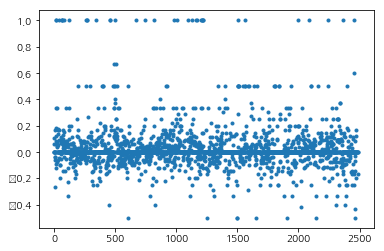

In [37]:
df['긍부정퍼센트'].plot(style='.')

In [35]:
import matplotlib.pyplot as plt

In [36]:
plt.show()

In [61]:
df['제목과내용'] = df['제목'] + '. ' + df['내용']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
